In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import warnings
warnings.simplefilter("ignore")

from IPython.display import display
pd.options.display.precision = 15
pd.options.display.max_rows = 10000
pd.options.display.max_columns = 1000
pd.options.display.max_colwidth = 1000

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

# google!
# base_path = '/content/drive/MyDrive/Colab Notebooks/미니프로젝트_모델링/data/'

base_path = '../../data/'

# train_id = pd.read_csv(base_path + 'train_identity.csv')
# train_trans = pd.read_csv(base_path + 'train_transaction.csv')
# test_id = pd.read_csv(base_path + 'test_identity.csv')
# test_trans = pd.read_csv(base_path + 'test_transaction.csv')
# submission = pd.read_csv(base_path + 'sample_submission.csv')

# CHK
# display(train_id.head())
# display(train_trans.head())
# display(test_id.head())
# display(test_trans.head())

In [3]:
# column명 변경
# test_id.columns = [i.replace('-','_') for i in test_id.columns]
# test_id

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,NaN,542.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android 6.0.1,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,-360.0,New,NotFound,225.0,NaN,271.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,567.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141902,4170230,-20.0,473365.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,NaN,153.0,325.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 71.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-J700M
141903,4170233,-5.0,489917.0,0.0,0.0,-4.0,-32.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,17.0,417.0,595.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 71.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-J320M
141904,4170234,-5.0,110081.0,NaN,NaN,22.0,-31.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,-300.0,New,NotFound,166.0,15.0,122.0,177.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 10.3.3,mobile safari 10.0,32.0,1334x750,match_status:2,T,F,F,T,mobile,iOS Device
141905,4170236,-45.0,266704.0,NaN,NaN,-3.0,-10.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 43.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,ALE-L23 Build/HuaweiALE-L23


In [4]:
# 전체 데이터셋 합
# train = train_trans.merge(train_id, how='left', on='TransactionID')
# test = test_trans.merge(test_id, how='left', on='TransactionID')

# CHK
# print(train.shape)
# print(test.shape)

In [ ]:
# 메모리 필요시 삭제
# del train_id, train_trans, test_id, test_trans

In [5]:
# 병합 파일 생성
# train.to_csv(base_path + 'train_merged.csv', index=False)
# test.to_csv(base_path + 'test_merged.csv', index=False)

In [98]:
df_train = pd.read_csv(base_path + 'train_merged.csv')
df_test = pd.read_csv(base_path + 'test_merged.csv')
print(df_train.shape)
print(df_test.shape)

(590540, 434)
(506691, 433)


In [ ]:
'''
## Dataframe size reduction
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

## memory reduction
df_train = reduce_mem_usage(df_train)
df_test = reduce_mem_usage(df_test)
'''

- https://www.kaggle.com/code/khyj00/ieee-cis-fraud-detection/notebook?scriptVersionId=74419082
- https://www.kaggle.com/code/kimjihoo/all-in-one-for-ieee-cis-fraud-detection-korean/notebook
- https://eda-ai-lab.tistory.com/448
- https://slowsteadystat.tistory.com/19

## Comments from Vesta: https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203

### 1. train_identity - 식별 정보 테이블
 - 거래와 관련된 식별 정보
    >1. 네트워크 연결 정보 (IP, ISP, Proxy 등등)  
    >
    >2. 디지털 서명 정보 (UA/browser/os/version 등등)

 - Vesta사의 사기 방지 시스템 및 디지털 보안 협력업체에서 수집  

 - 개인 정보 보호 및 계약 동의로 인해 상세한 내용은 제공되지 않음  
 
 - 범주형 변수: DeviceType, DeviceInfo, id12 - id38  

- Categorical Features of Identity Table:
    > - DeviceType
    > - DeviceInfo
    > - id_12 - id_38

### 2. train_transaction - 거래 정보 테이블
- TransactionDT: 주어진 reference datetime으로부터의 timedelta 값 (실제 timestamp가 아님)  
    > timedelta 값이란? date, time 또는 datetime 인스턴스 간의 차이, 초단위

- TransactionAMT: 결제 금액 (단위: 달러)
- ProductCD: 제품 코드 (범주형 변수)
- card1 - card6: 결제 카드 정보 (예를 들어, 카드 유형, 발행 은행, 국가 등등) (범주형 변수)
- addr: 주소 (범주형 변수)
- dist: 거리
- P_ and (R__) emaildomain: 구매자와 수취인의 이메일 도메인 (범주형 변수)
- C1-C14: 카운팅 정보 (예를 들어, 결제 카드와 관련 있는 주소의 수 등등) -> 실제 의미는 숨겨져 있음
- D1-D15: timedelta 값 (예를 들어, 이전 거래한 날짜와의 차이)
- M1-M9: 일치 정보 - Matched(예를 들어, 카드에 적힌 이름 일치하는지, 주소가 일치하는지 등등) (범주형 변수)
- Vxxx: Vesta사에서 만들어낸 변수 (랭킹, 카운팅, 관계 등등)  

- Categorical Features of Transaction Table:
    > - ProductCD
    > - card1 - card6
    > - addr1, addr2
    > - P_emaildomain
    > - R_emaildomain
    > - M1 - M9

### The list of columns without the missingness (결측치가 없는 컬럼 리스트)
- isFraud  

- TransactionAmt  

- ProductCD  

- card1  

- C1~C14  

### Discussions and Topics: https://www.kaggle.com/linwangatvesta/discussion?sortBy=mostVotes&group=commentsAndTopics&page=1&pageSize=20

- We define reported chargeback on card, user account, associated email address and transactions directly linked to these attributes as fraud transaction (isFraud=1); If none of above is found after 120 days, then we define as legit (isFraud=0)
    > 카드, 사용자 계정, 관련 이메일 주소 및 이러한 속성에 직접 연결된 거래에 대해 보고된 지불 거절을 사기 거래(isFraud=1)로 정의합니다. 120일 후에도 위의 항목이 발견되지 않으면 합법적인 것으로 정의합니다(isFraud=0).
- These payments are from different countries, including North America, Latin America, Europe. But TransactionAmt has been converted to USD. 
    > 금액은 모두 달러로 환산
- addr1 as billing zipcode(region) addr2 as billing country. 
    > addr1은 우편번호(지역), addr2는 국가  
- dist: distances between (not limited) billing address, mailing address, zip code, IP address, phone area, etc.
    > 무언지 모르는 두 지점 간 거리
- All variables marked as categorical are unordered. There're some of boolean variables marked as categorical too.
The remaining variables are having numerical characteristics **(one of which is the ordering matters)**. Your observation is correct - there're some numerical variables are having limited values. For example, how many email address are linked to a payment card; the count is an integer, which you can treat as either numerical or categorical; However, **ordering of that indeed indicates risk level**. 
    > 범주형 데이터 중 하나는 번호 순서가 리스크 레벨을 나타내는데 매우 주요함
- TransactionID in transaction table and identity (for both train and test dataset) are not necessary matched. Some transaction has identity information, else don't. If you join the two tables correctly, you'll find many missing values in identity columns, which is a challenge in our fraud detection. 
    > 조인 잘하면 널값 채울 수 있다.
- Regarding ProductCD, you may understand it as we sell several different product (Product W, C, R, H, S) and each product has its own fraud rate. When we build and evaluate models, we'll try different perspectives, not only the entire volume of transactions, but also in segmentation. In other words, we try hard to do best in all products. 
    > 상품에 따라 이상 발생 확률이 다르다.
- A card contains many information, including card category (credit, debit), card type (visa, mastercard, discover, etc), issue bank (Chase, Citi, etc) and issue country, etc. We encoded the real values due to data privacy. 
    > card는 카드종류, 카드사, 발행은행, 발행국가, (초기 번호 몇 자리) 등 인코딩 한 값
- P-Purchaser; R-Recipient 
    > P-구매자; R-판매자
- Yes, all transactions linked to the same payment card which is identified as fraudulent will be labeled as fraud. However, exact card information is NOT included in the dataset. 
    > 이상 카드로 판명되면 관련 결제건은 모두 이상 거래
-  TransactionID is unique identification number (UID), it's used to join the two tables. It won't and shouldn't appear more than once. 
    > TransactionID는 고유값(UID)이며, 테이블 조인할 때 사용









In [7]:
# Missing CHK
def top_missing_cols(df,n=10,thresh=80):
    """
    returns missing columns in dataframe with missing values percent > thresh
    if n=None. It will gave whole dataframe with missing values percent > thresh
    """
    
    dff = (df.isnull().sum()/df.shape[0])*100
    dff = dff.reset_index()
    dff.columns = ['col','missing_percent']
    dff = dff.sort_values(by=['missing_percent'],ascending=False).reset_index(drop=True)
    print(f'There are {df.isnull().any().sum()} columns in this dataset with missing values.')
    print(f'There are {dff[dff["missing_percent"] > thresh].shape[0]} columns with missing percent values than {thresh}%')
    if n:
        return dff.head(n)
    else:
        return dff

In [8]:
top_missing_cols(df_train,thresh=90)

There are 414 columns in this dataset with missing values.
There are 12 columns with missing percent values than 90%


,col,missing_percent
0,id_24,99.196159447285538
1,id_25,99.130964879601720
2,id_07,99.127070139194643
3,id_08,99.127070139194643
4,id_21,99.126392793036871
5,id_26,99.125715446879127
6,id_27,99.124699427642497
7,id_23,99.124699427642497
8,id_22,99.124699427642497
9,dist2,93.628374030548315


In [9]:
top_missing_cols(df_test,thresh=90)

There are 385 columns in this dataset with missing values.
There are 10 columns with missing percent values than 90%


,col,missing_percent
0,id_24,99.064518611935085
1,id_25,99.005508288088791
2,id_26,99.003929416547749
3,id_21,99.001561109236206
4,id_08,99.001561109236206
5,id_07,99.001561109236206
6,id_27,99.000969032408321
7,id_23,99.000969032408321
8,id_22,99.000969032408321
9,dist2,92.809029566343199


In [10]:
cat_cols = ['ProductCD','card1','card2','card3','card4','card5','card6','P_emaildomain','R_emaildomain','M1',
'M2','M3','M4','M5','M6','M7','M8','M9','id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19',
'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29','addr1','addr2',
'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']

for col in cat_cols:
    df = pd.concat([df_train[col],df_test[col]],axis=0)
    sh = df.value_counts().shape[0]
    missing = round((df.isnull().sum()/df.shape[0])*100,2)
    print(f'No of unique values in {col} is {sh} | missing percent is {missing}%')

No of unique values in ProductCD is 5 | missing percent is 0.0%
No of unique values in card1 is 17091 | missing percent is 0.0%
No of unique values in card2 is 501 | missing percent is 1.6%
No of unique values in card3 is 133 | missing percent is 0.42%
No of unique values in card4 is 4 | missing percent is 0.42%
No of unique values in card5 is 138 | missing percent is 0.8%
No of unique values in card6 is 4 | missing percent is 0.42%
No of unique values in P_emaildomain is 60 | missing percent is 14.91%
No of unique values in R_emaildomain is 60 | missing percent is 75.1%
No of unique values in M1 is 2 | missing percent is 40.81%
No of unique values in M2 is 2 | missing percent is 40.81%
No of unique values in M3 is 2 | missing percent is 40.81%
No of unique values in M4 is 3 | missing percent is 47.32%
No of unique values in M5 is 2 | missing percent is 60.16%
No of unique values in M6 is 2 | missing percent is 29.92%
No of unique values in M7 is 2 | missing percent is 52.98%
No of uni

In [11]:
# Target(isFraud) CHK
df_train['isFraud'].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

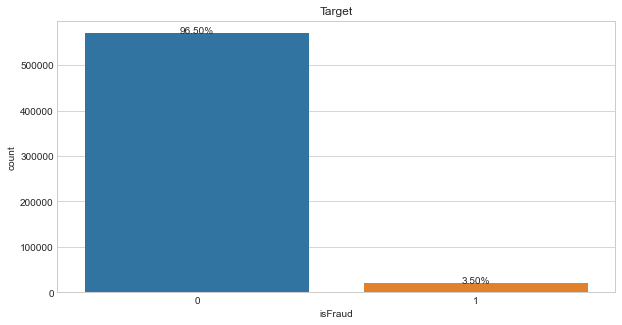

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10,5))
sns.countplot(df_train['isFraud'])
axes.title.set_text('Target')
total = float(df_train['isFraud'].shape[0])  
for p in axes.patches:
    height = p.get_height()
    axes.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height*100/total),
            ha="center") 
plt.show()

==> 3.5% is fraud

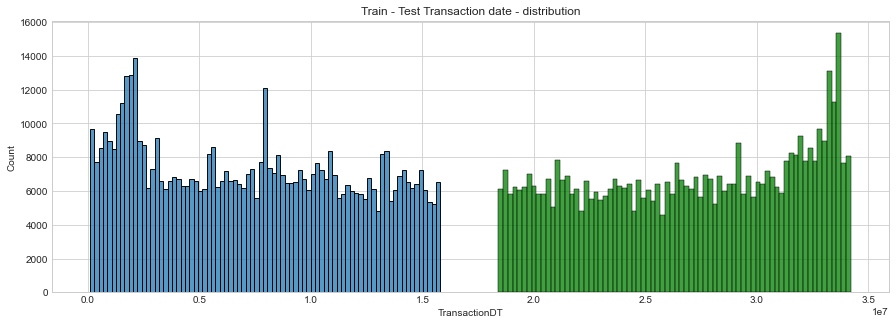

In [14]:
# TransactionDT CHK
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(15,5))
sns.histplot(df_train['TransactionDT'])
sns.histplot(df_test['TransactionDT'],color='g')
axes.title.set_text('Train - Test Transaction date - distribution')
plt.show()

==> train dataset과 test dataset 사이에 시간차가 있음. 특정 시간대에 거래가 몰림

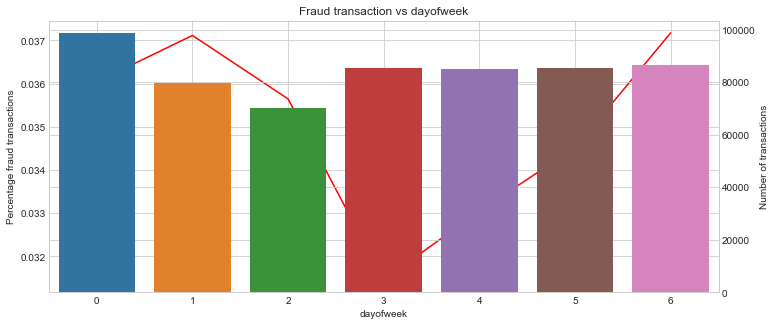

In [19]:
# Fraud by dayofweek
df_train['dayofweek'] = (df_train['TransactionDT']//(60*60*24)-1)%7
tmp = df_train[['isFraud','dayofweek']].groupby(by=['dayofweek']).mean().reset_index() \
            .rename(columns={'isFraud':'Percentage fraud transactions'})

tmp_count = df_train[['TransactionID','dayofweek']].groupby(by=['dayofweek']).count().reset_index() \
            .rename(columns={'TransactionID':'Number of transactions'})
tmp = tmp.merge(tmp_count,on=['dayofweek'])


fig, axes = plt.subplots(figsize=(12,5))
axes = sns.lineplot(x=tmp['dayofweek'],y=tmp['Percentage fraud transactions'],color='r')
axes2 = axes.twinx()
axes2 = sns.barplot(x=tmp['dayofweek'],y=tmp['Number of transactions'])
axes.set_title('Fraud transaction vs dayofweek')
plt.show()

==> Fraud는 주말에 몰리는 경향이 있으나 거래건수는 요일별 큰 차이 보이지 않음

In [94]:
df_test['dayofweek'] = (df_test['TransactionDT']//(60*60*24)-1)%7

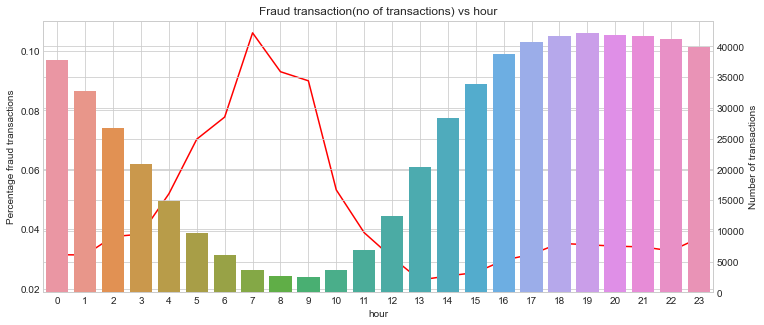

In [22]:
# num of Fraud by hour a day
df_train['hour'] = (df_train['TransactionDT']//(60*60))%24
tmp = df_train[['isFraud','hour']].groupby(by=['hour']).mean().reset_index() \
            .rename(columns={'isFraud':'Percentage fraud transactions'})

tmp_count = df_train[['TransactionID','hour']].groupby(by=['hour']).count().reset_index() \
            .rename(columns={'TransactionID':'Number of transactions'})
tmp = tmp.merge(tmp_count,on=['hour'])


fig, axes = plt.subplots(figsize=(12,5))
axes = sns.lineplot(x=tmp['hour'],y=tmp['Percentage fraud transactions'],color='r')
axes2 = axes.twinx()
axes2 = sns.barplot(x=tmp['hour'],y=tmp['Number of transactions'])
axes.set_title('Fraud transaction(no of transactions) vs hour')
plt.show()

==> 거래건수와 Fraud가 거의 반비례하게 나타남. 오전시간(6시~9시)에 급증

In [95]:
df_test['hour'] = (df_test['TransactionDT']//(60*60))%24

In [24]:
# TransactionAMT CHK
df_train['TransactionAmt'].isnull().sum()

0

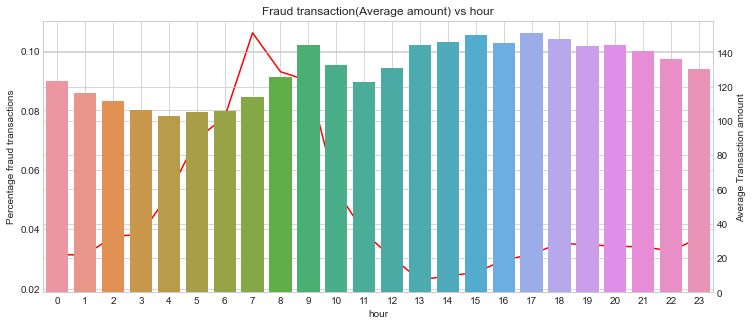

In [26]:
# Avg of TransactionAMT by hour a day
df_train['hour'] = (df_train['TransactionDT']//(60*60))%24
tmp = df_train[['isFraud','hour']].groupby(by=['hour']).mean().reset_index() \
            .rename(columns={'isFraud':'Percentage fraud transactions'})

tmp_amount = df_train[['TransactionAmt','hour']].groupby(by=['hour']).mean().reset_index() \
            .rename(columns={'TransactionAmt':'Average Transaction amount'})
tmp = tmp.merge(tmp_amount,on=['hour'])


fig, axes = plt.subplots(figsize=(12,5))
axes = sns.lineplot(x=tmp['hour'],y=tmp['Percentage fraud transactions'],color='r')
axes2 = axes.twinx()
axes2 = sns.barplot(x=tmp['hour'],y=tmp['Average Transaction amount'])
axes.set_title('Fraud transaction(Average amount) vs hour')
plt.show()

==> 평균 거래금액에 따른 시간대별 차이는 많지 않음

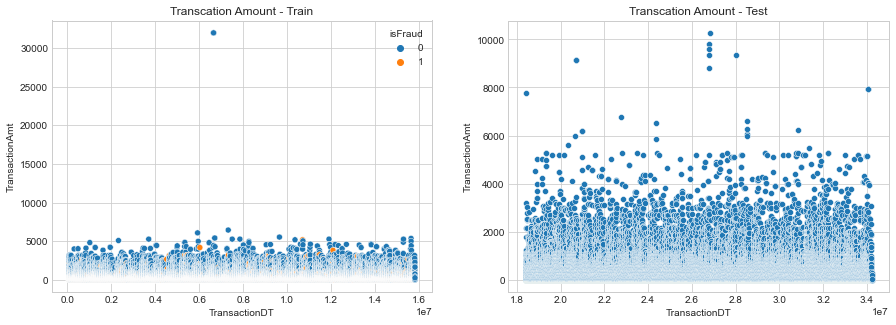

In [27]:
# outlier CHK
fig, axes = plt.subplots(1,2,figsize=(15,5))

sns.scatterplot(y=df_train['TransactionAmt'],x=df_train['TransactionDT'],hue=df_train['isFraud'],ax=axes[0])
axes[0].title.set_text('Transcation Amount - Train')

sns.scatterplot(y=df_test['TransactionAmt'],x=df_test['TransactionDT'],ax=axes[1])
axes[1].title.set_text('Transcation Amount - Test')

plt.show()

==> KNN과 같은 상대 거리 기반 알고리즘에 영향을 줄 수 있는 이상치 제거

In [28]:
# df_train.shape

(590540, 436)

In [29]:
# deleting huge gap outlier over 30000
df_train = df_train[df_train['TransactionAmt'] < 30000]
df_train.shape

(590538, 436)

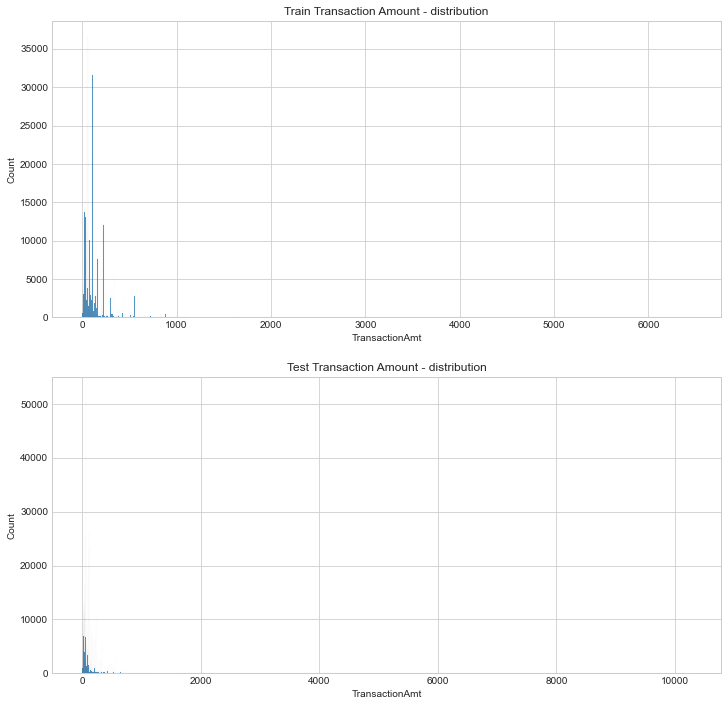

In train data Minimum transaction amount is 0.251 and maximum amount  is 6450.97
In test data Minimum transaction amount is 0.018 and maximum amount  is 10270.0


In [30]:
# distribution of TransactionAMT CHK
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(12,12))
sns.histplot(df_train['TransactionAmt'],ax=axes[0])
sns.histplot(df_test['TransactionAmt'],ax=axes[1])
axes[0].title.set_text('Train Transaction Amount - distribution')
axes[1].title.set_text('Test Transaction Amount - distribution')
plt.show()

print(f'In train data Minimum transaction amount is {df_train["TransactionAmt"].min()} and maximum amount  is {df_train["TransactionAmt"].max()}')
print(f'In test data Minimum transaction amount is {df_test["TransactionAmt"].min()} and maximum amount  is {df_test["TransactionAmt"].max()}')

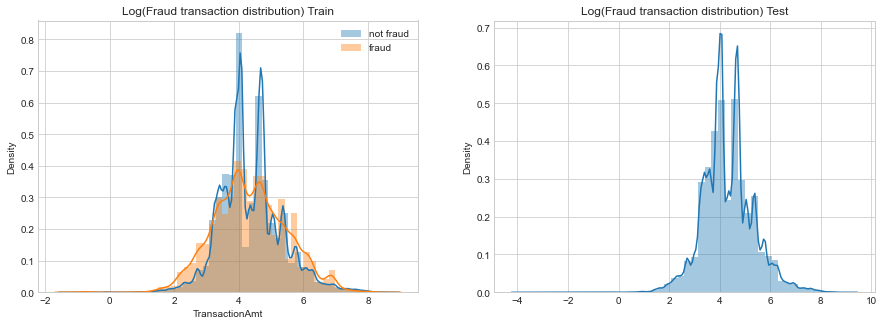

In [41]:
# Fraud by TransactionAMT -> logarithm transform
test_amt = np.log(df_test[['TransactionAmt']])

dff_fraud = df_train[df_train['isFraud'] == 1]
dff_nofraud = df_train[df_train['isFraud'] == 0]

dff_fraud['TransactionAmt'] = np.log(dff_fraud['TransactionAmt'])
dff_nofraud['TransactionAmt'] = np.log(dff_nofraud['TransactionAmt'])


fig,axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(dff_nofraud['TransactionAmt'],ax=axes[0],label='not fraud')
sns.distplot(dff_fraud['TransactionAmt'],ax=axes[0],label='fraud')
axes[0].title.set_text('Log(Fraud transaction distribution) Train')
axes[0].legend()

sns.distplot(test_amt,ax=axes[1])
axes[1].title.set_text('Log(Fraud transaction distribution) Test')
plt.show()

==> 거래대금은 대부분 소액 결제에 집중되어 있음

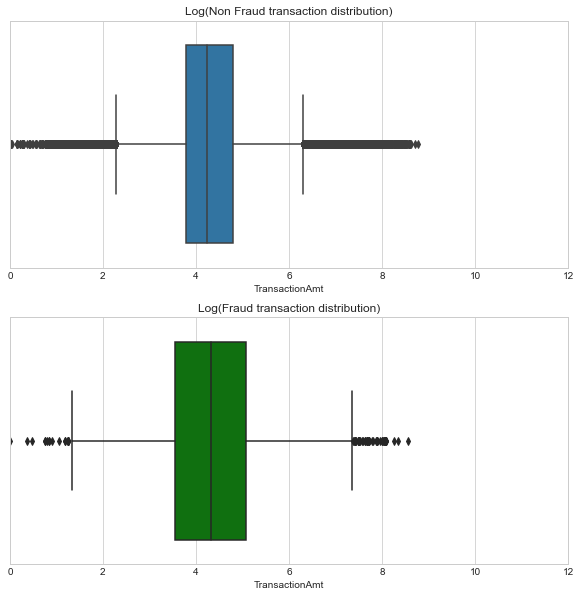

Mean transaction amt for fraud is 4.3506 ie, 77.5264 dollars
Mean transaction amt for non-fraud is 4.3643 ie, 78.5962 dollars
Median transaction amt for fraud is 4.3175  ie, 75.0000 dollars
Median transaction amt for non-fraud is 4.2268  ie, 68.5000 dollars


In [44]:
# Fraud distribution by TransactionAMT
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(10,10))
sns.boxplot(dff_notfraud['TransactionAmt'],ax=axes[0])
axes[0].title.set_text('Log(Non Fraud transaction distribution)')
axes[0].set(xlim=(0, 12))
sns.boxplot(dff_fraud['TransactionAmt'],ax=axes[1],color='g')
axes[1].title.set_text('Log(Fraud transaction distribution)')
axes[1].set(xlim=(0, 12))
plt.show()

print('Mean transaction amt for fraud is {:.4f} ie, {:.4f} dollars'.format(dff_fraud['TransactionAmt'].mean(),np.exp(dff_fraud['TransactionAmt'].mean())))
print('Mean transaction amt for non-fraud is {:.4f} ie, {:.4f} dollars'.format(dff_notfraud['TransactionAmt'].mean(),np.exp(dff_notfraud['TransactionAmt'].mean())))

print('Median transaction amt for fraud is {:.4f}  ie, {:.4f} dollars'.format(dff_fraud['TransactionAmt'].median(),np.exp(dff_fraud['TransactionAmt'].median())))
print('Median transaction amt for non-fraud is {:.4f}  ie, {:.4f} dollars'.format(dff_notfraud['TransactionAmt'].median(),np.exp(dff_notfraud['TransactionAmt'].median())))

==> Fraud의 중앙값 분포가 더 넓음. 3.3<로그값<5.5 범위를 벗어나는 경우 Fraud 확률 더 높을것

In [45]:
# ProductCD CHK
df_train['ProductCD'].isnull().sum()

0

In [46]:
df_train['ProductCD'].value_counts()

W    439668
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64

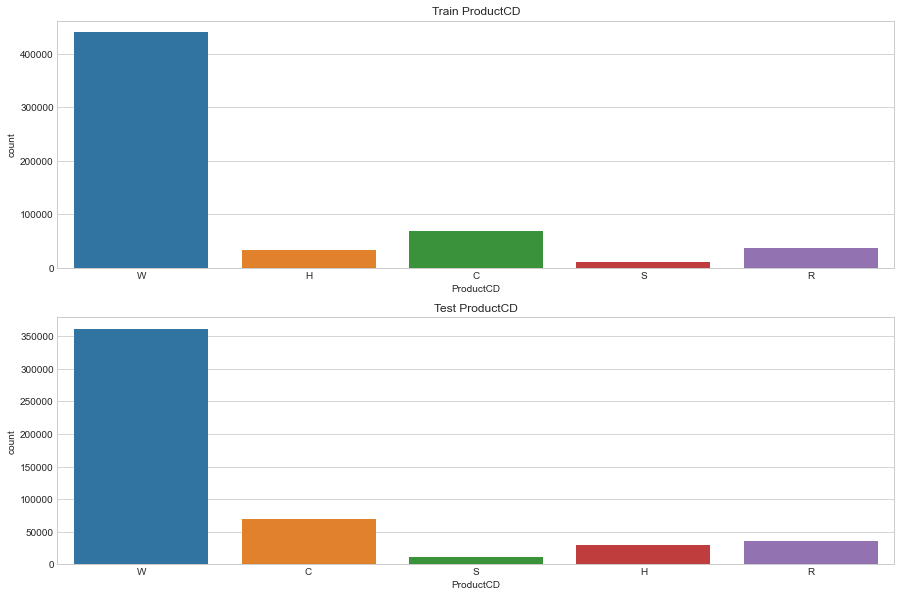

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(15,10))
sns.countplot(df_train['ProductCD'],ax=axes[0])
sns.countplot(df_test['ProductCD'],ax=axes[1])
axes[0].title.set_text('Train ProductCD')
axes[1].title.set_text('Test ProductCD')
plt.show()

In [53]:
# idea from https://www.kaggle.com/gpreda/home-credit-default-risk-extensive-eda
def hor_plot(feat,df=df_train,label_rotation=False,shape=(15,5)):
    
    val_cnts = df[feat].value_counts()
    df1 = pd.DataFrame({feat: val_cnts.index,'Number of units': val_cnts.values})
    # Calculate the percentage of target=1 per category value.For that what we did is we took the mean value of TARGET
    percent = df[[feat, 'isFraud']].groupby([feat],as_index=False).mean()
    percent.sort_values(by='isFraud', ascending=False, inplace=True)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=shape)
    s = sns.barplot(ax=ax1, x = feat, y="Number of units",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feat, y='isFraud', order=percent[feat], data=percent)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    plt.ylabel('Percent of Fraud transactions [Target with value 1]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.show();


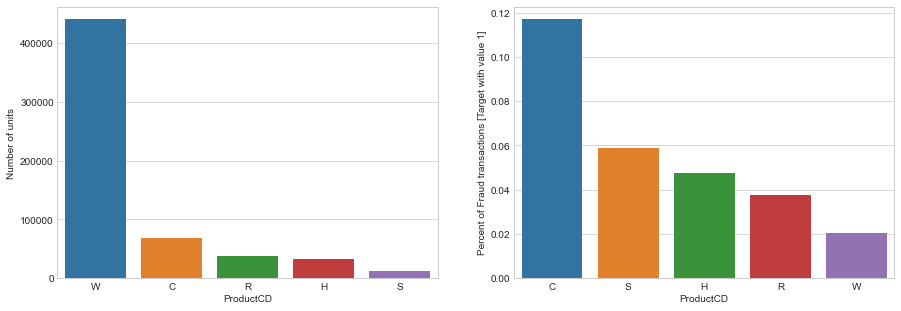

In [54]:
hor_plot(df=df_train,feat='ProductCD')

==> 거래건수는 W가 가장 많으나 Fraud 비율은 가장 낮음. 오히려 C의 Fraud 비중이 가장 높고(약 12%) 거래비중 가장 낮은 S의 경우도 약 6%로 2순위 임.

In [55]:
# cards CHK
cards = [col for col in df_train.columns if 'card' in col]
df_train[cards].head()

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit


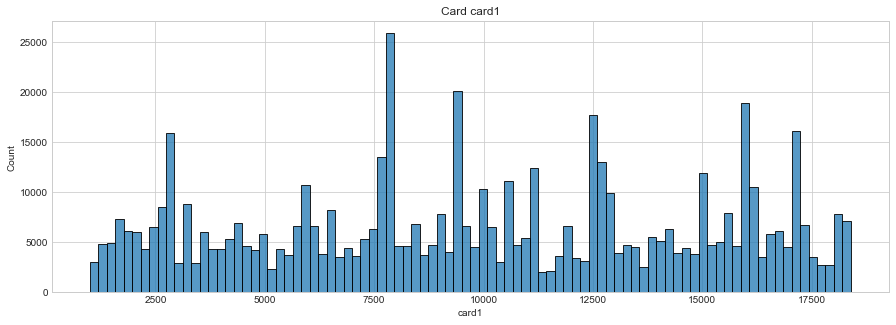

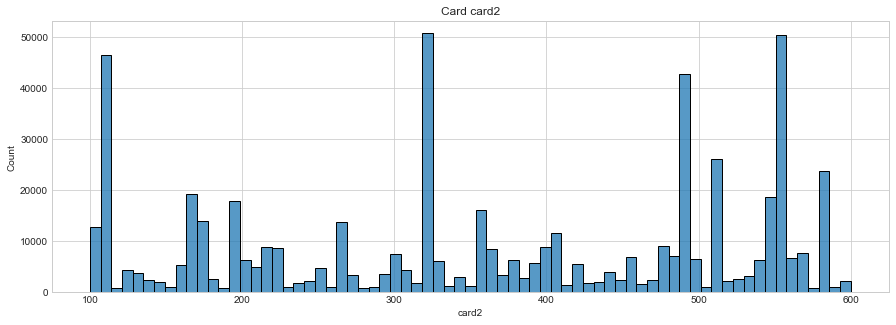

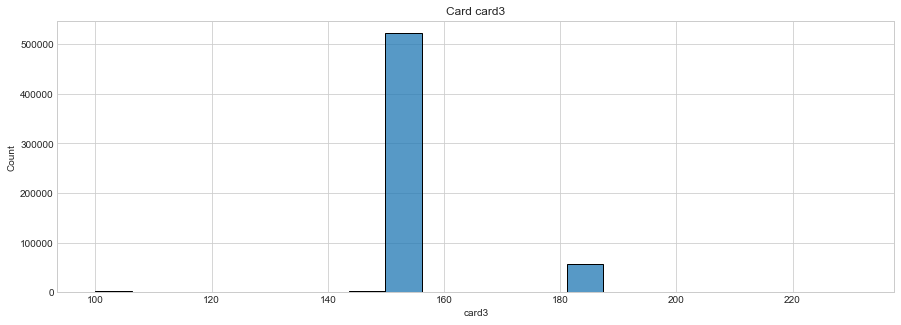

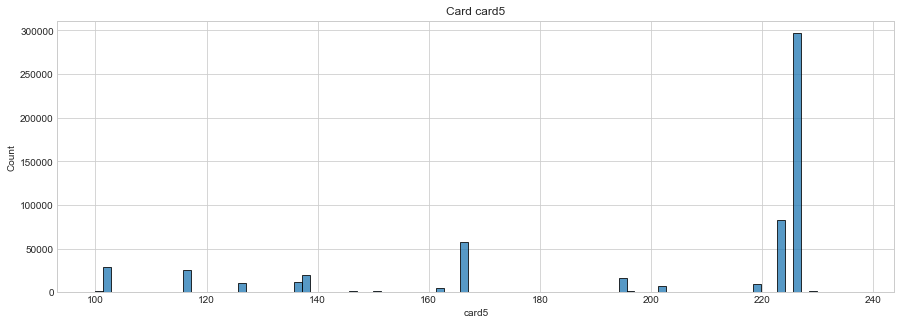

In [59]:
for c in cards:
    if df_train[c].dtypes in ['int64','float64']:
        fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(15,5))
        sns.histplot(df_train[c])
        axes.title.set_text(f'Card {c}')
        plt.show()

==> card3, card5는 특정 value에 다수 카운트

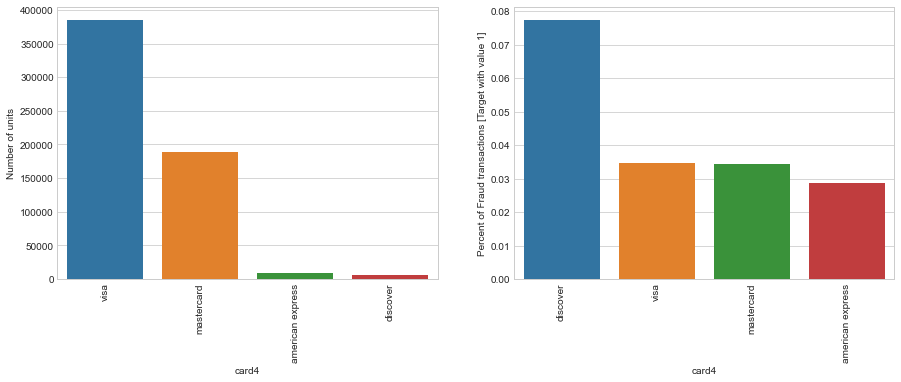

In [60]:
hor_plot('card4',label_rotation=True)

==> visa가 거래건수 가장 많으나, Fraud는 discover가 가장 많음

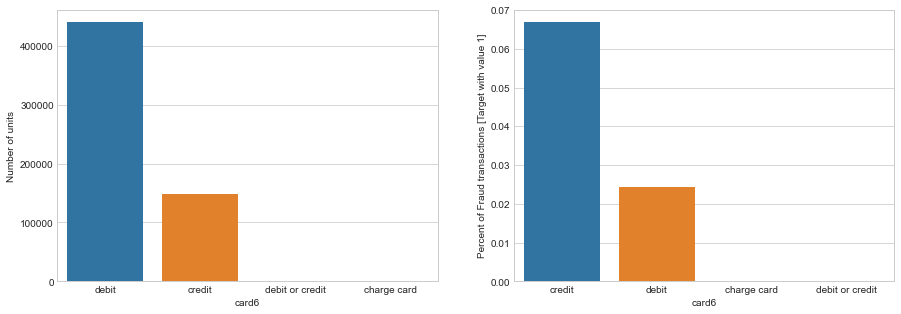

In [61]:
hor_plot('card6')

==> 거래건수는 debit이 많으나 Fraud는 credit이 가장 많음

In [72]:
cards = ['card1','card2','card3','card4','card5','card6','isFraud']
df_train[cards].corr()

,card1,card2,card3,card5,isFraud
card1,1.000000000000000,0.004956202813717,0.002966171639100,-0.093623734616602,-0.013639194716458
card2,0.004956202813717,1.000000000000000,0.023817442599952,0.030494376251812,0.003388511439917
card3,0.002966171639100,0.023817442599952,1.000000000000000,-0.158387183260411,0.154151181065824
card5,-0.093623734616602,0.030494376251812,-0.158387183260411,1.000000000000000,-0.033581406257322
isFraud,-0.013639194716458,0.003388511439917,0.154151181065824,-0.033581406257322,1.000000000000000


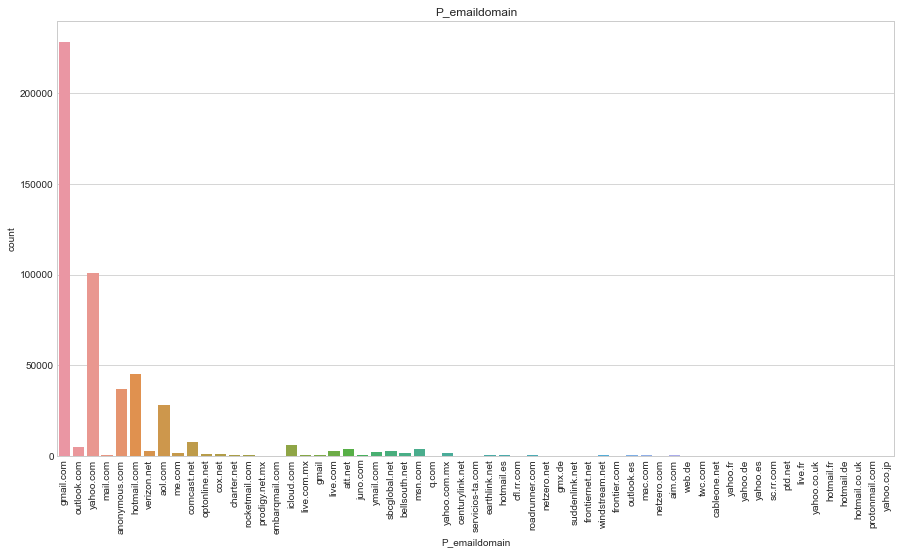

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(15,8))
sns.countplot(df_train['P_emaildomain'])
axes.title.set_text('P_emaildomain')
axes.set_xticklabels(axes.get_xticklabels(),rotation=90)
plt.show()

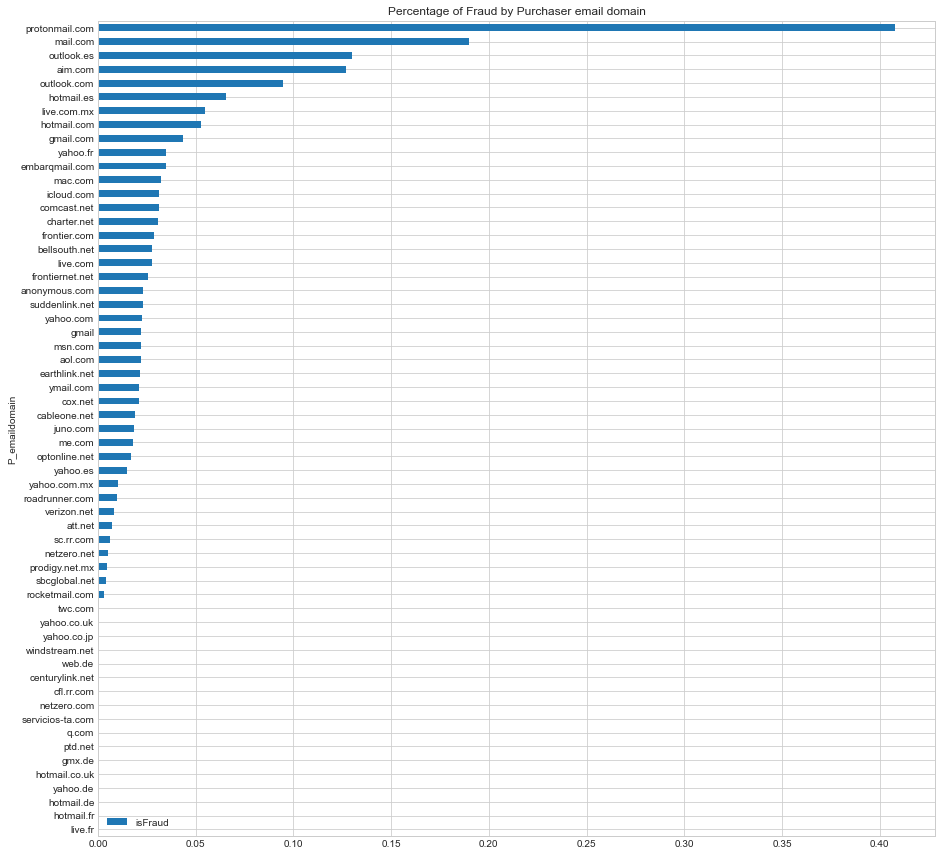

In [75]:
df_train[['P_emaildomain','isFraud']].groupby(by=['P_emaildomain']).mean() \
        .sort_values(by=['isFraud']).plot(kind='barh',
        figsize=(15, 15),
         title='Percentage of Fraud by Purchaser email domain')
plt.show()

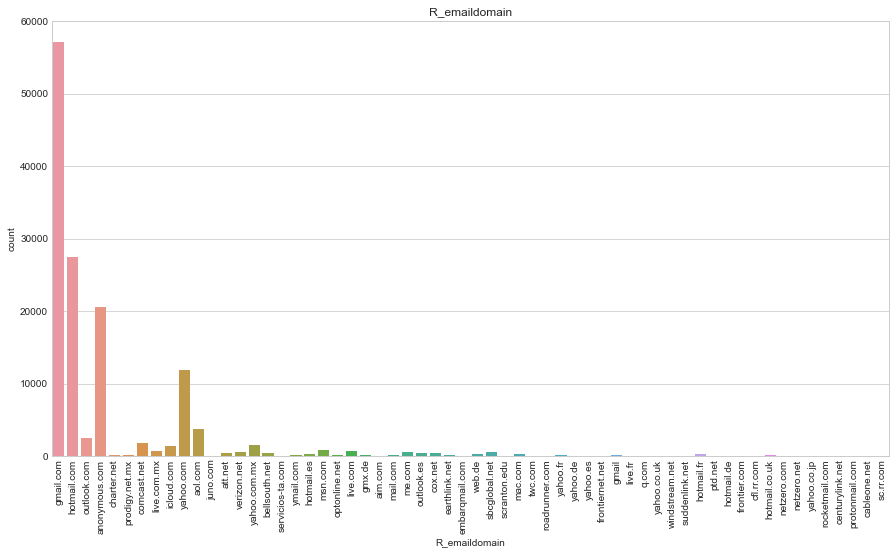

In [76]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(15,8))
sns.countplot(df_train['R_emaildomain'])
axes.title.set_text('R_emaildomain')
axes.set_xticklabels(axes.get_xticklabels(),rotation=90)
plt.show()

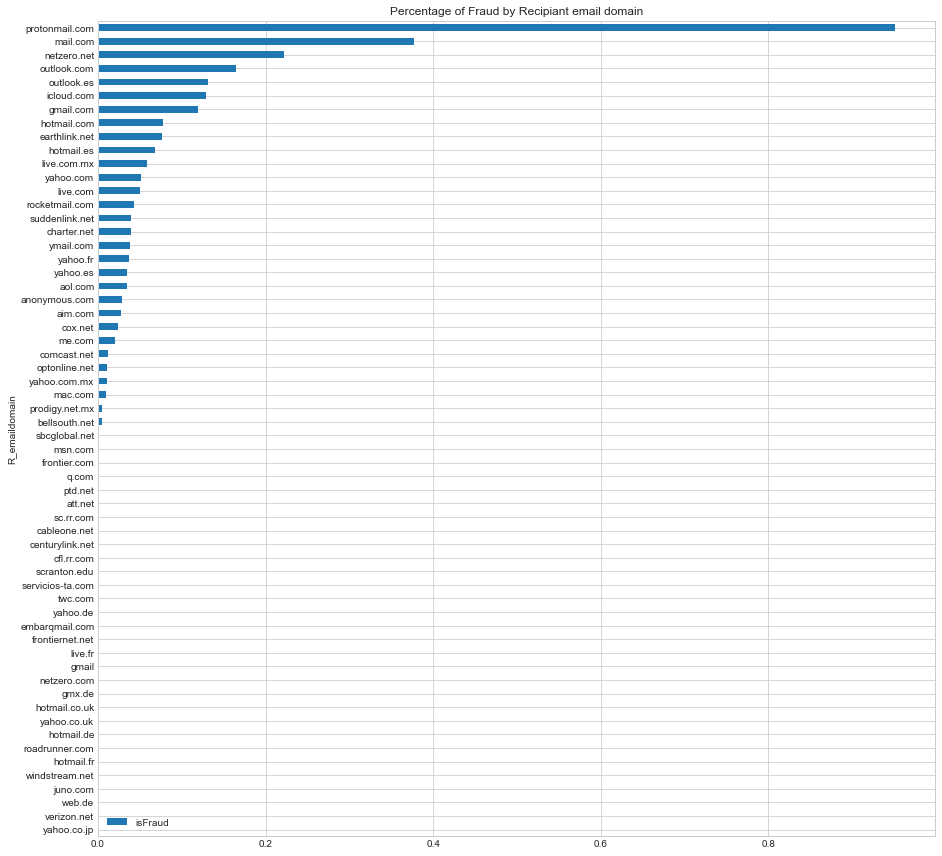

In [78]:
df_train[['R_emaildomain','isFraud']].groupby(by=['R_emaildomain']).mean() \
        .sort_values(by=['isFraud']).plot(kind='barh',
        figsize=(15, 15),
         title='Percentage of Fraud by Recipiant email domain')
plt.show()

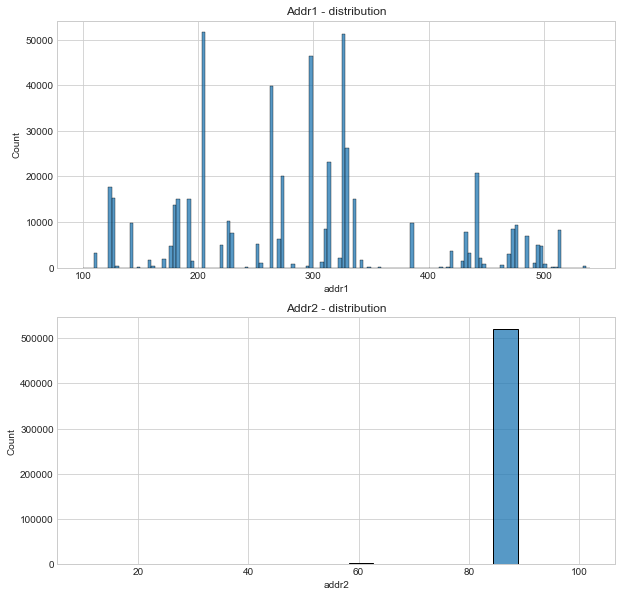

In [80]:
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(10,10))
sns.histplot(df_train['addr1'],ax=axes[0])
sns.histplot(df_train['addr2'],ax=axes[1])
axes[0].title.set_text('Addr1 - distribution')
axes[1].title.set_text('Addr2 - distribution')
plt.show()

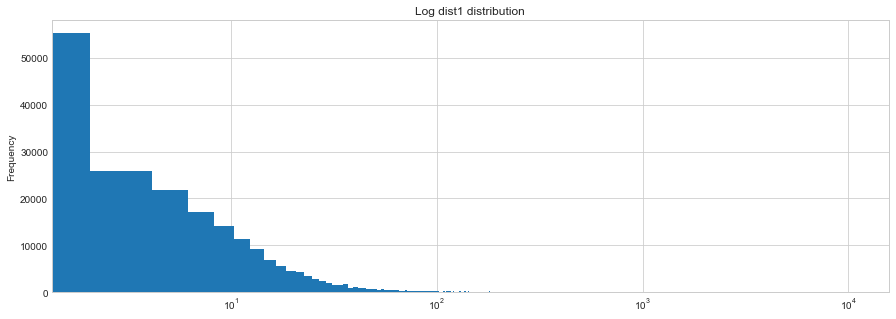

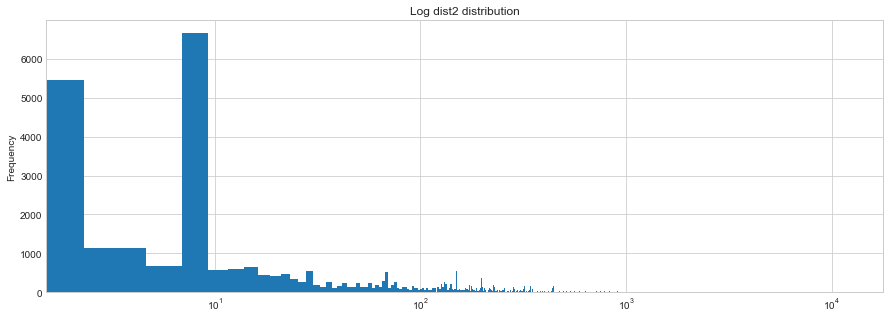

In [83]:
df_train['dist1'].plot(kind='hist',
                                bins=5000,
                                figsize=(15, 5),
                                title='Log dist1 distribution',
                                logx=True)
plt.show()

df_train['dist2'].plot(kind='hist',
                                bins=5000,
                                figsize=(15, 5),
                                title='Log dist2 distribution',
                                logx=True)
plt.show()

==> Reminder: 93% of data in dist2 is missing 

In [84]:
c_cols = [c for c in df_train if c[0] == 'C']
df_train[c_cols].head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0


In [85]:
# Sample 500 fraud and 500 non-fraud examples to plot
sample_df = pd.concat([df_train.loc[df_train['isFraud'] == 0].sample(500),
                       df_train.loc[df_train['isFraud'] == 1].sample(500)])

In [89]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<Figure size 2160x2160 with 0 Axes>

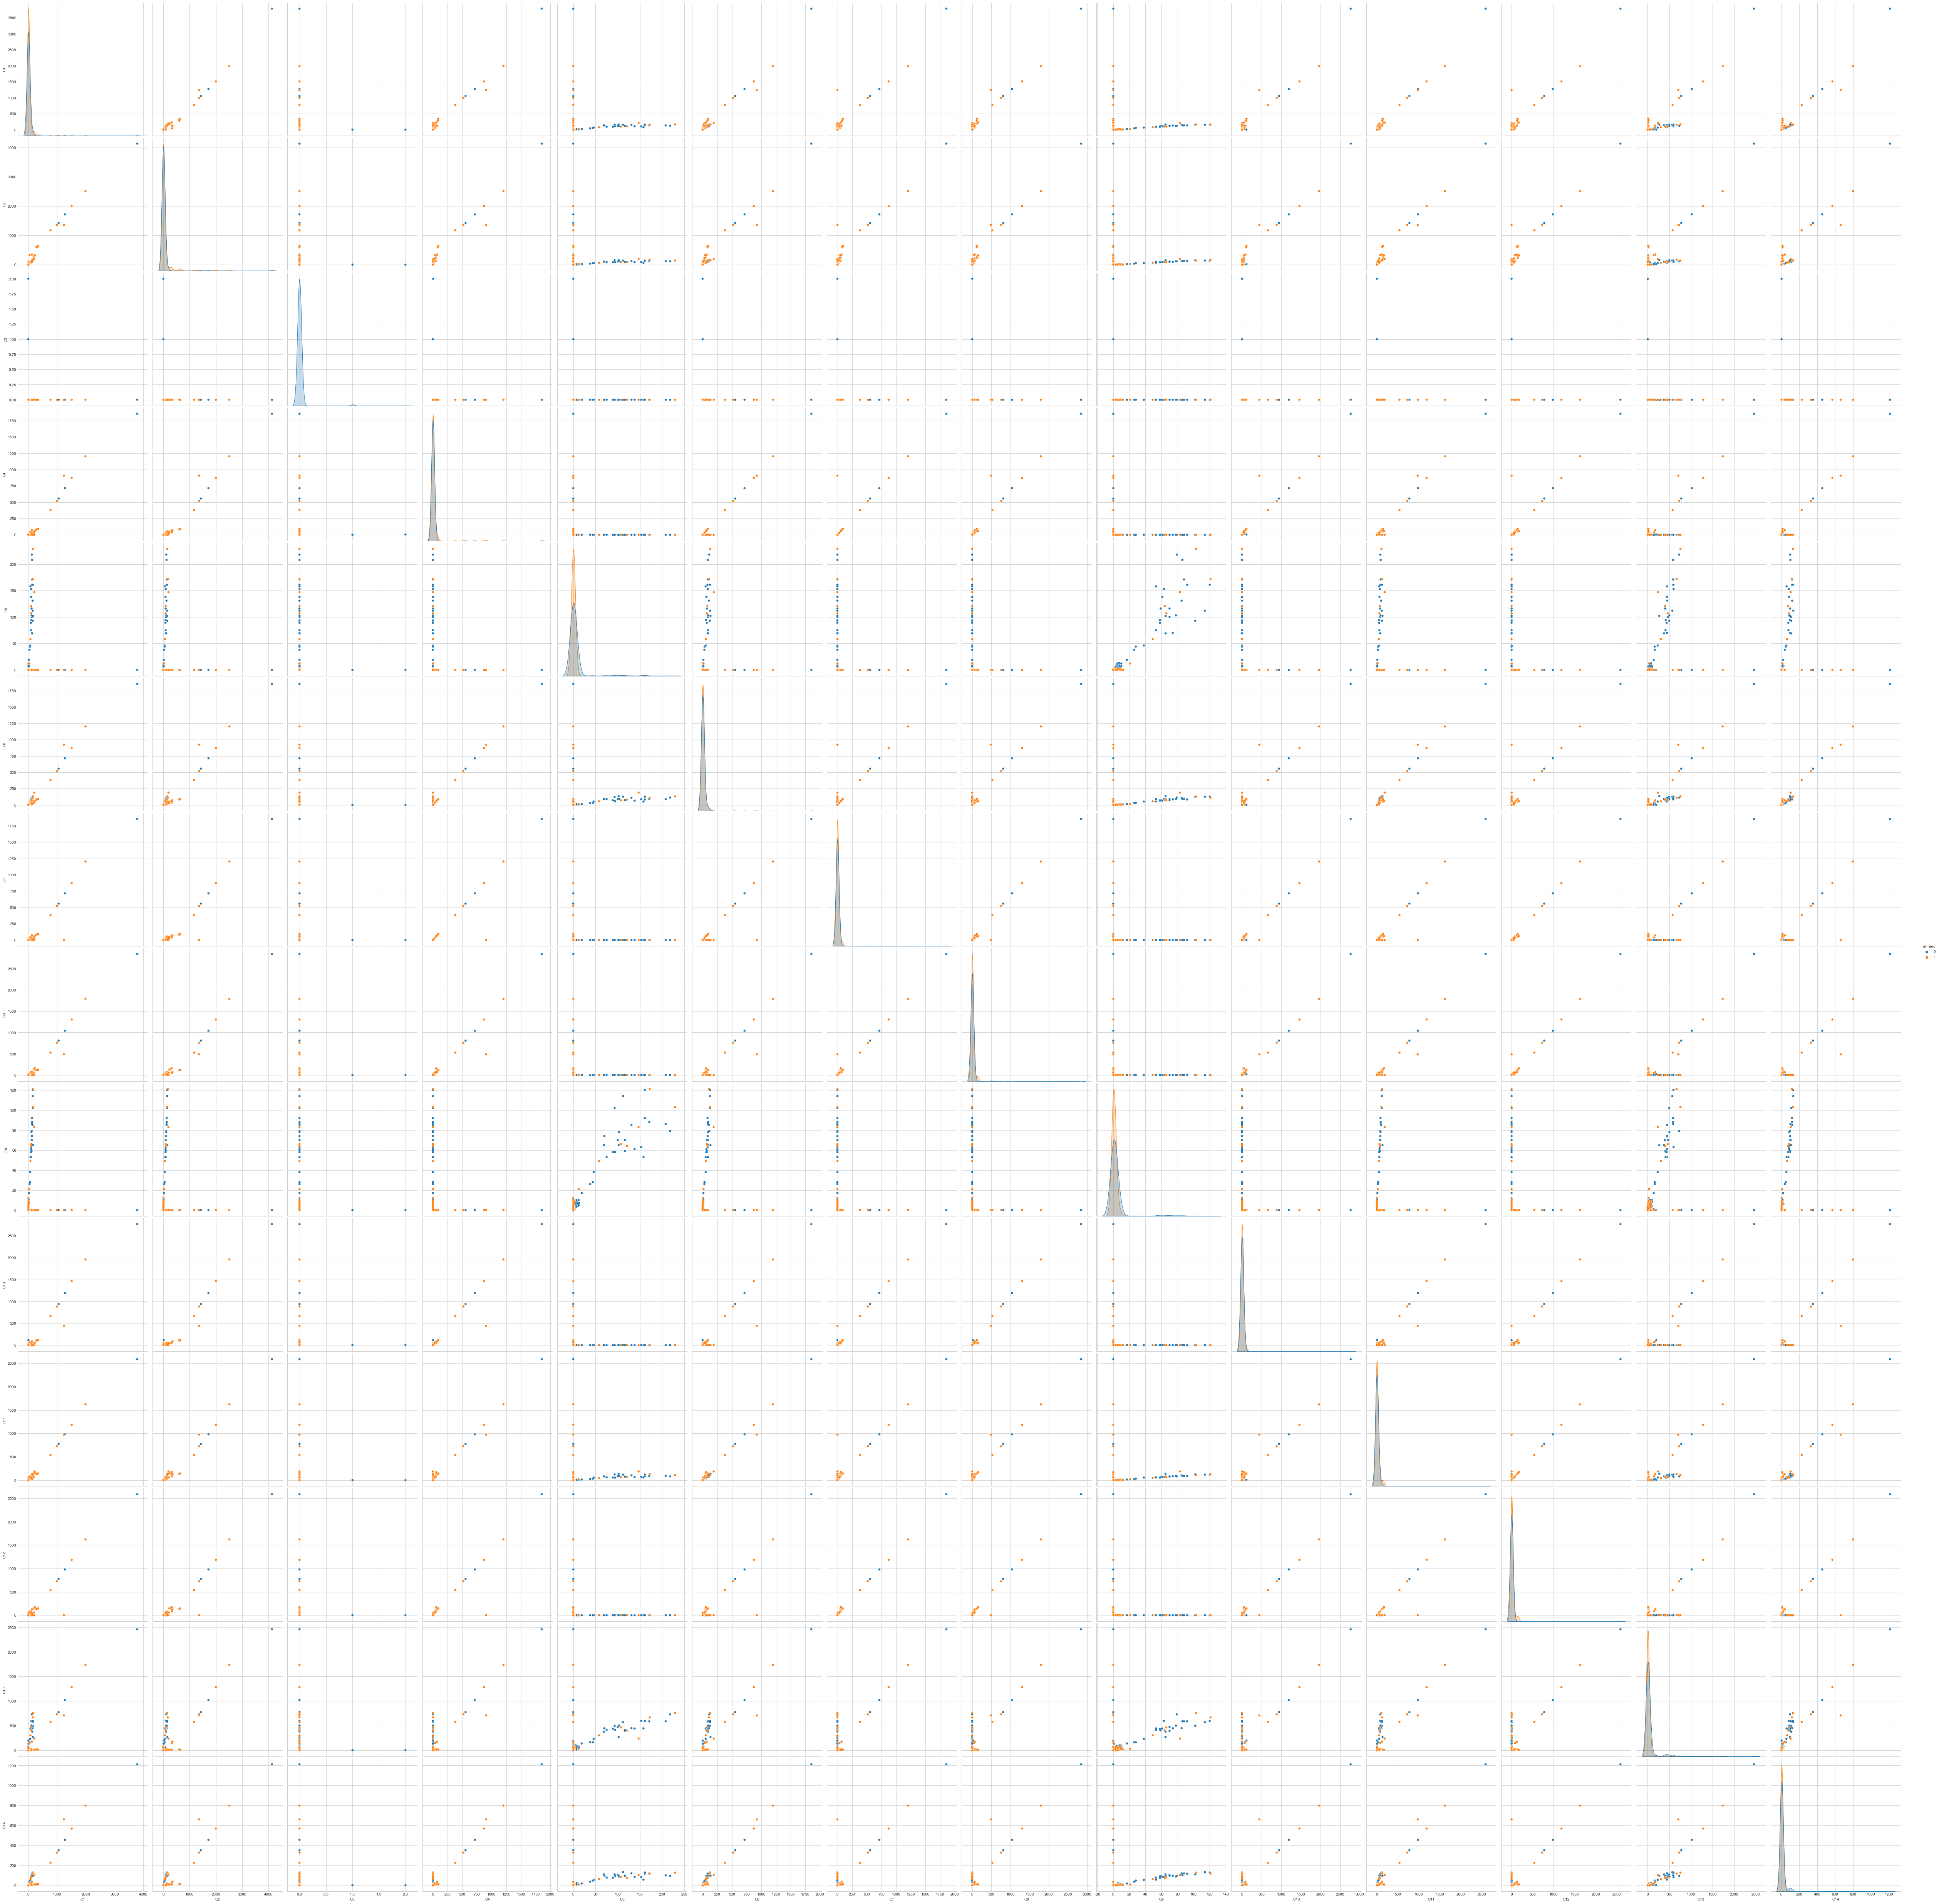

In [88]:
plt.figure(figsize=(30,30))
sns.pairplot(sample_df, 
             hue='isFraud',
            vars=c_cols,height=5)
plt.show()

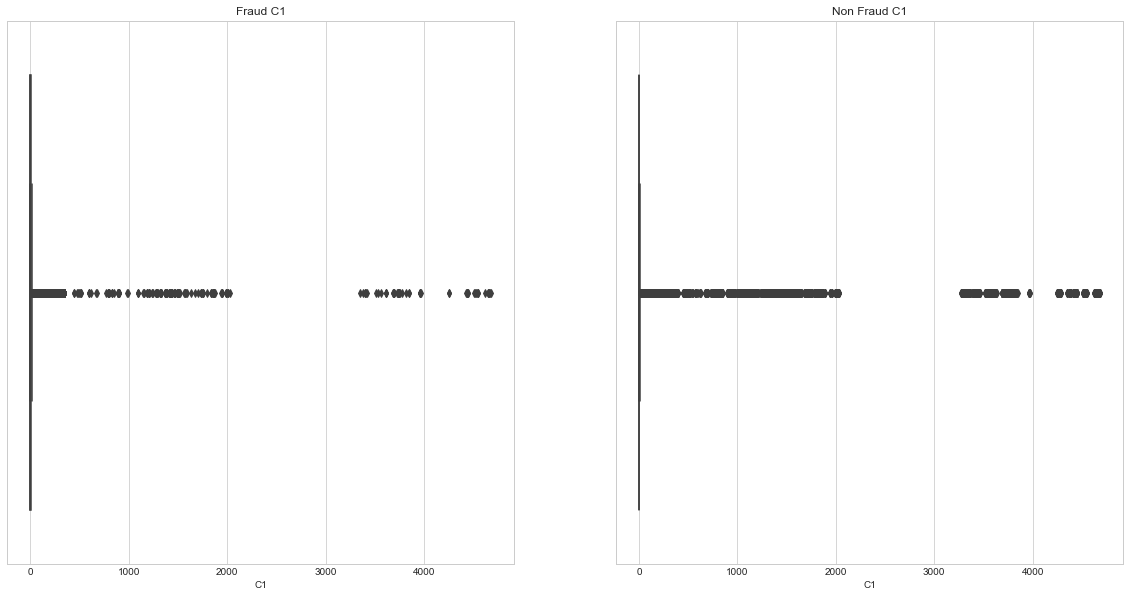

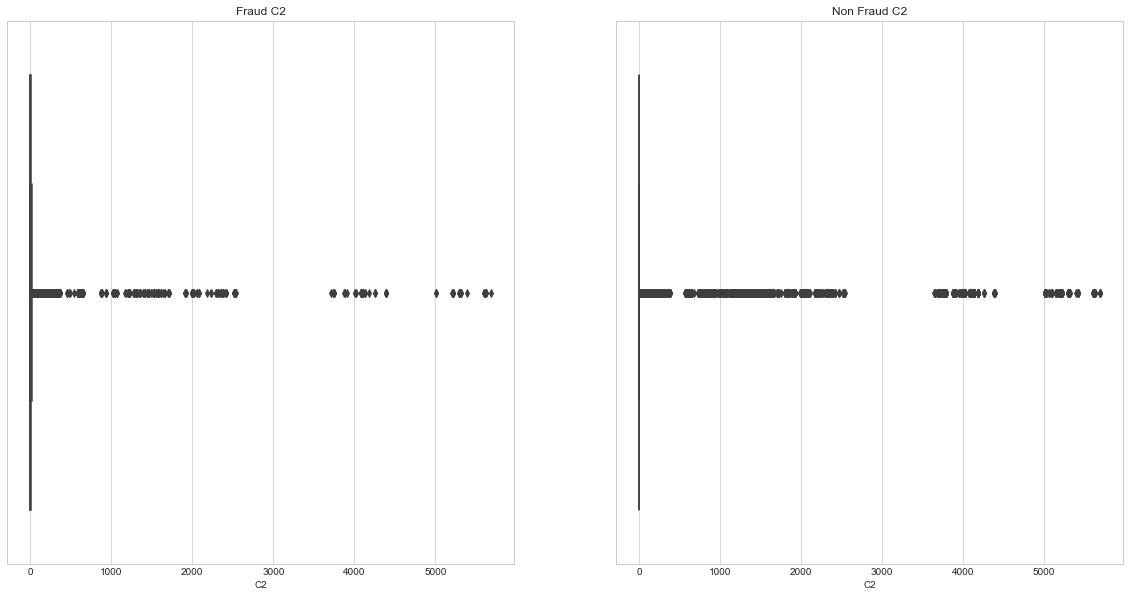

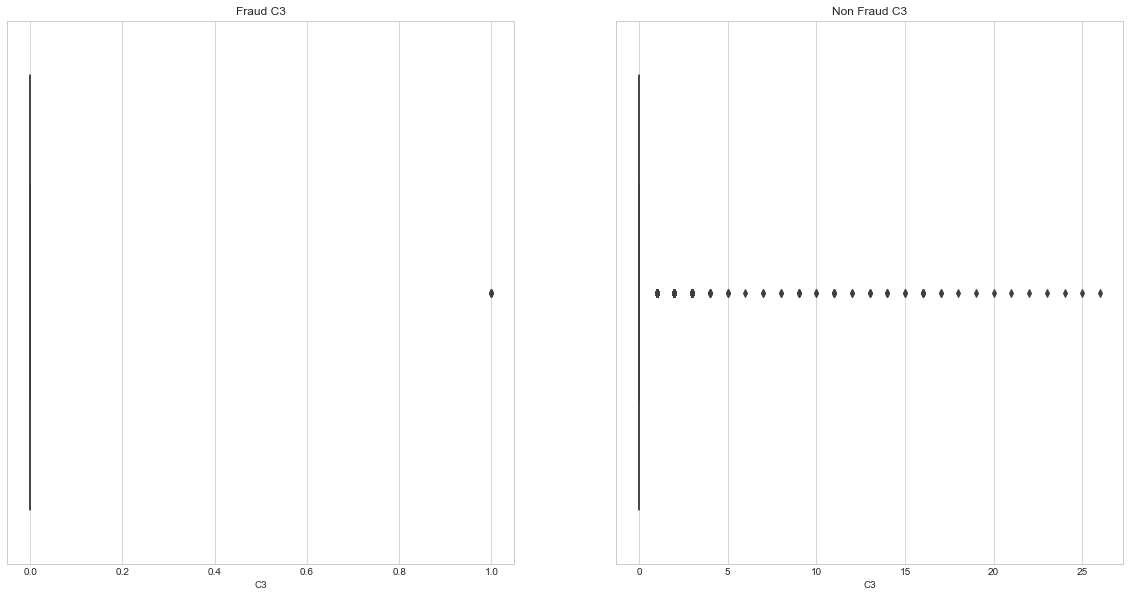

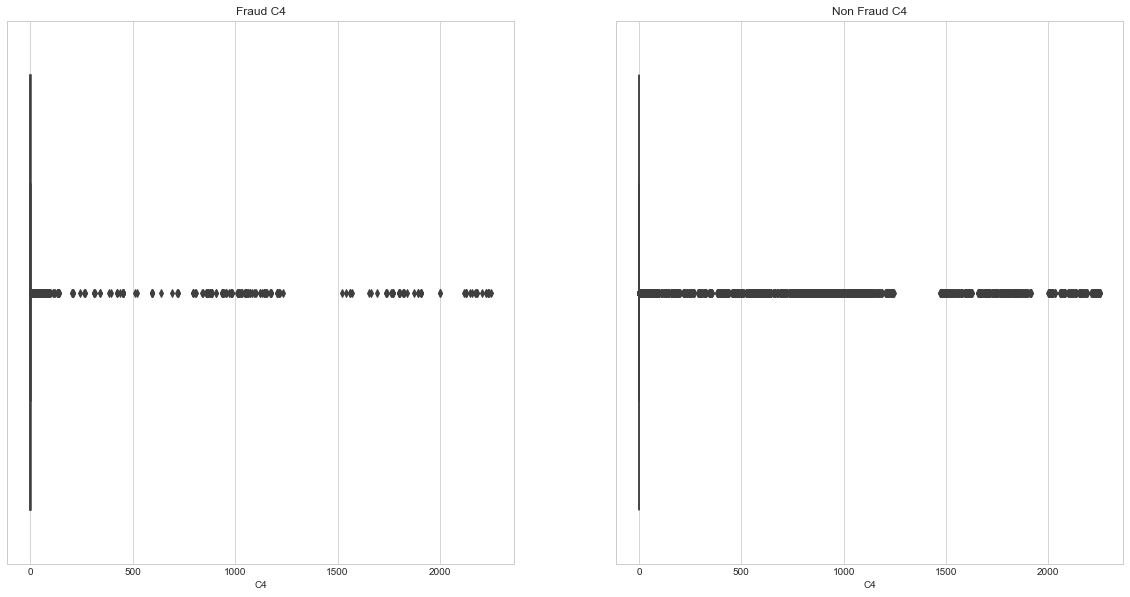

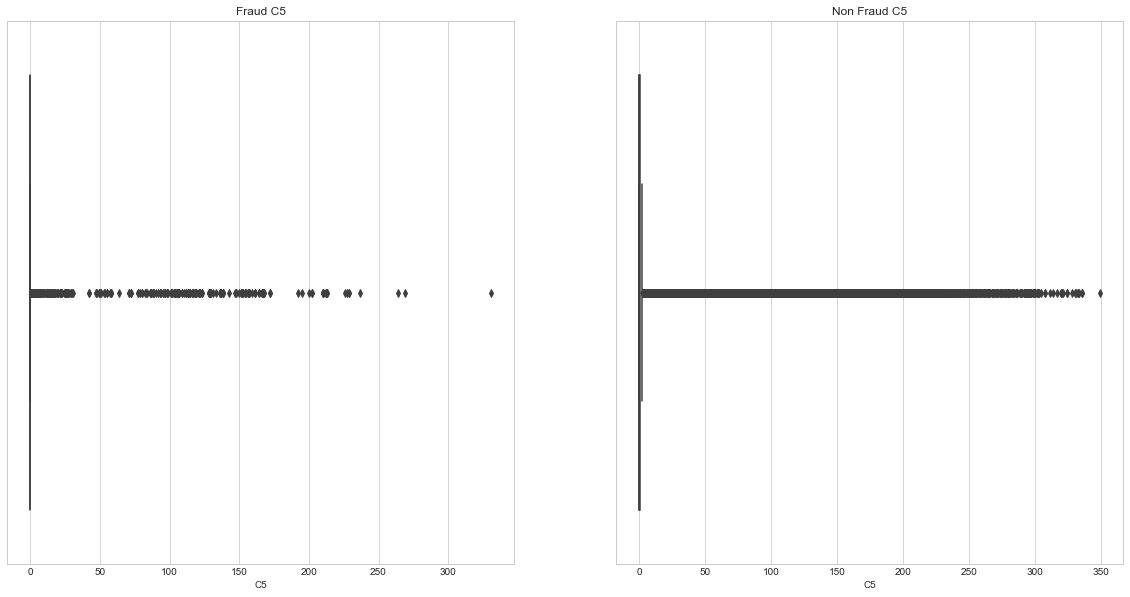

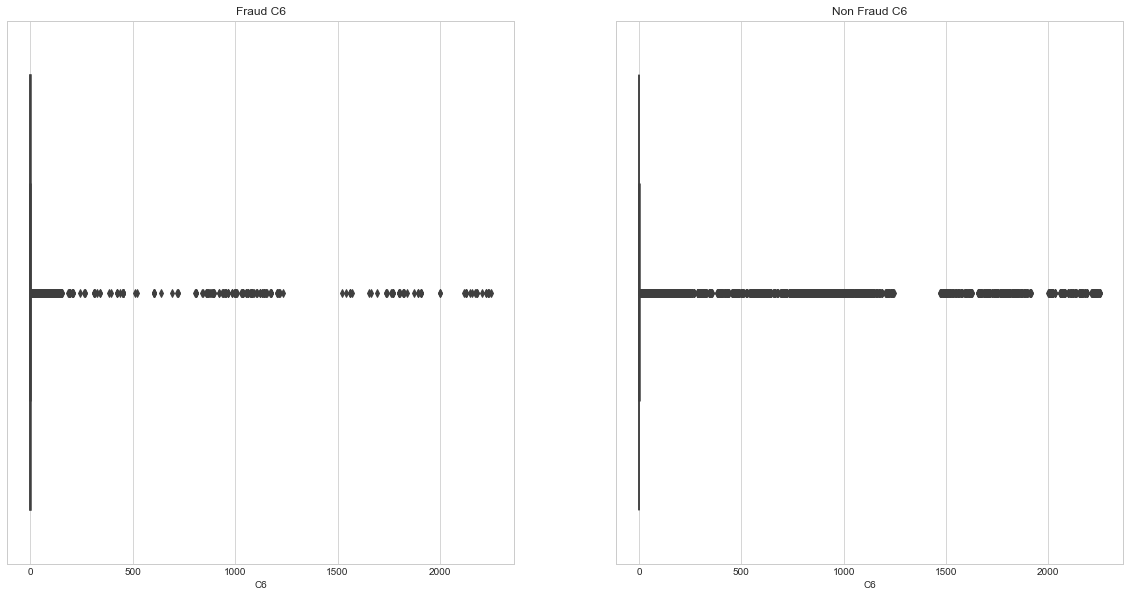

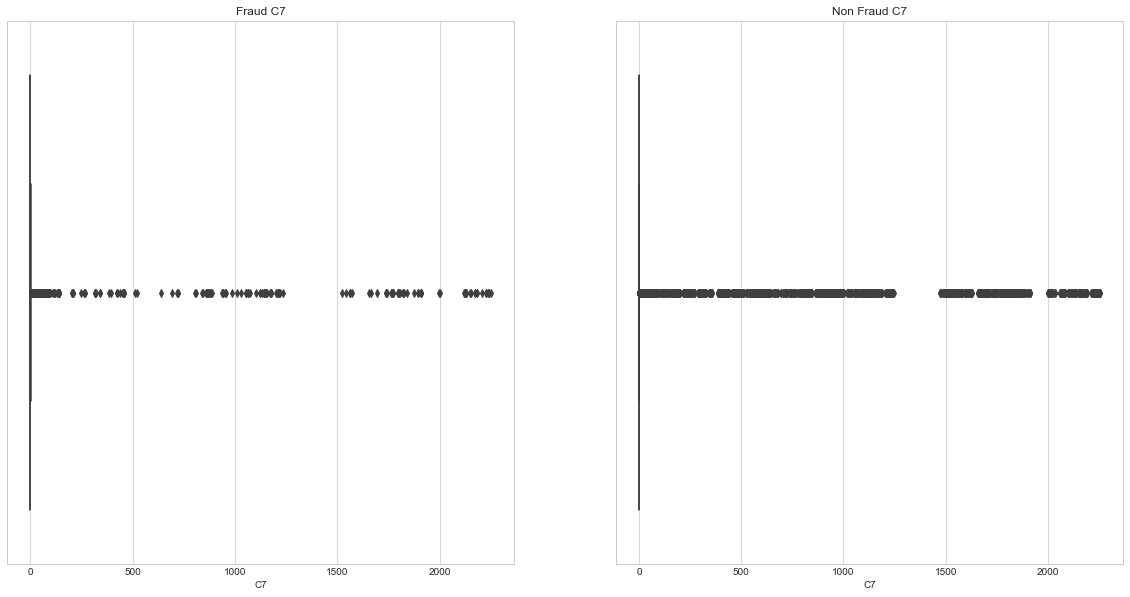

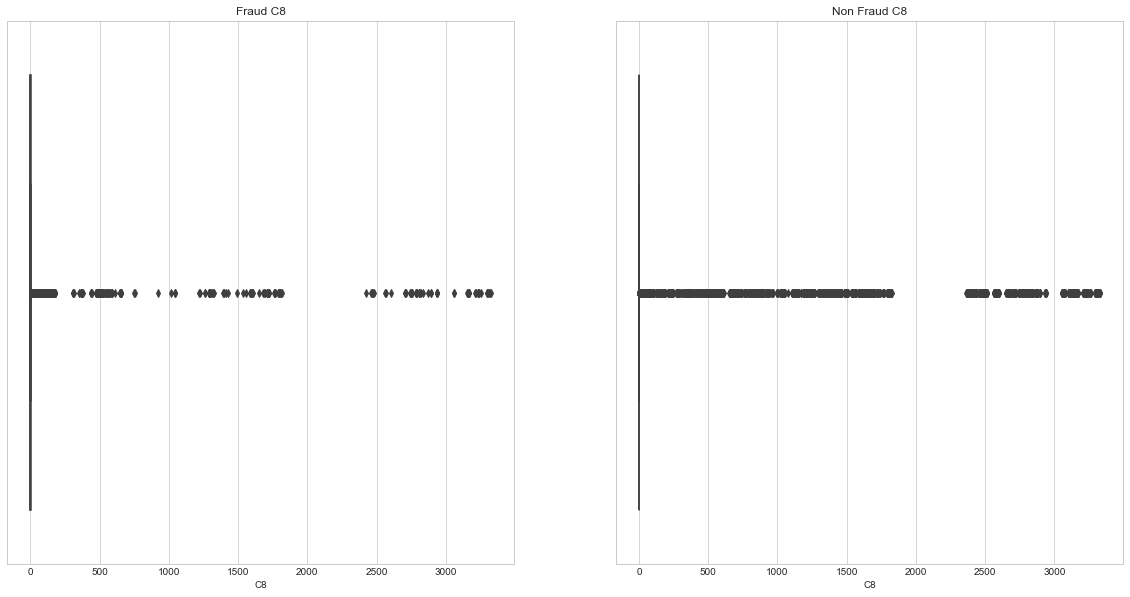

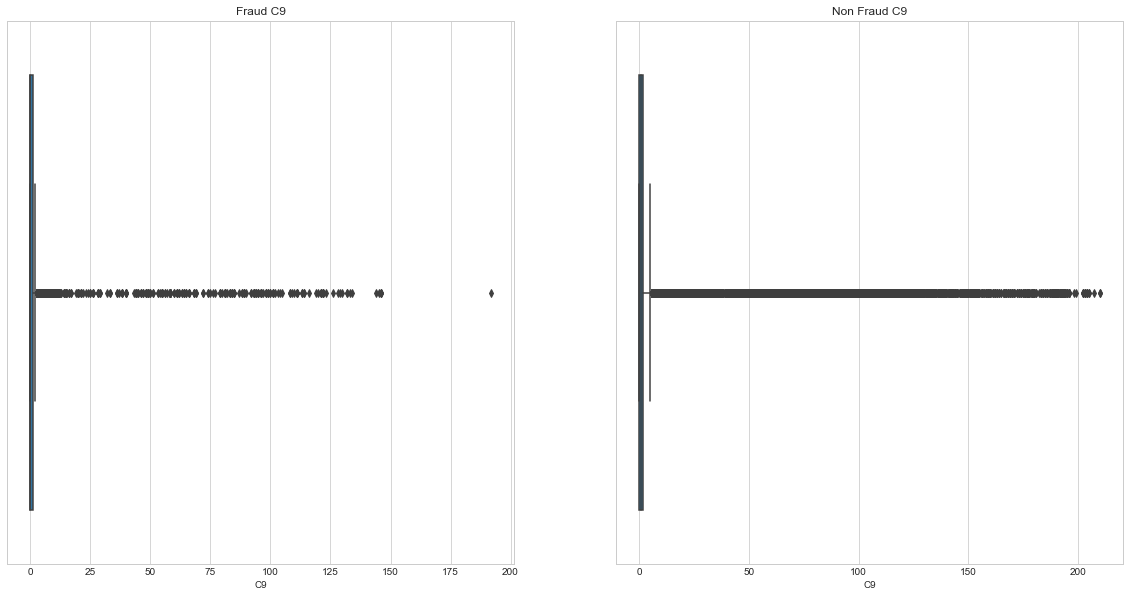

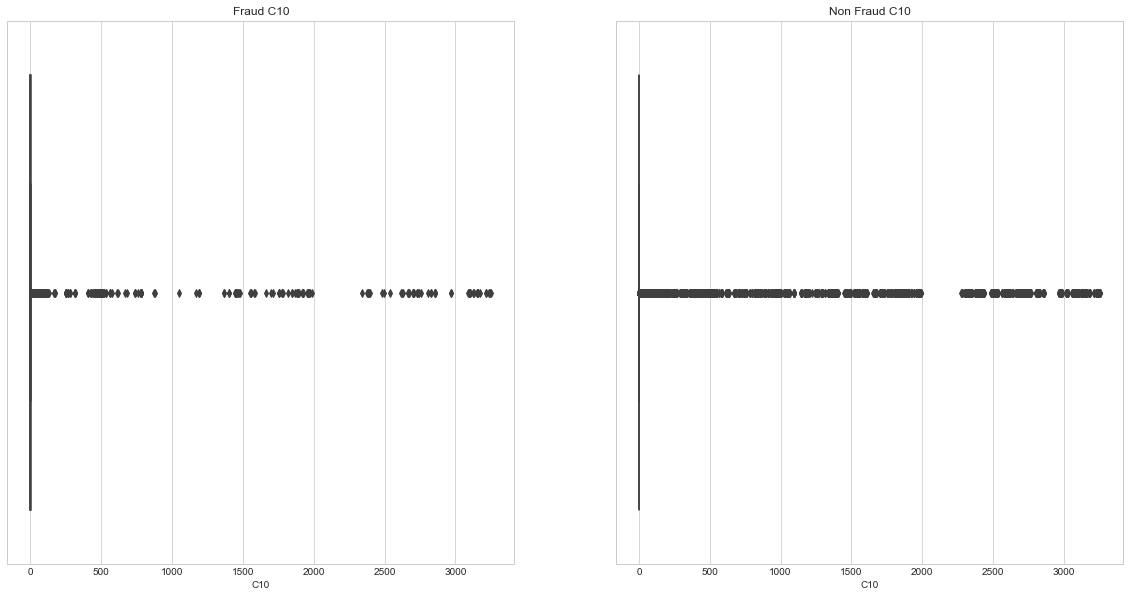

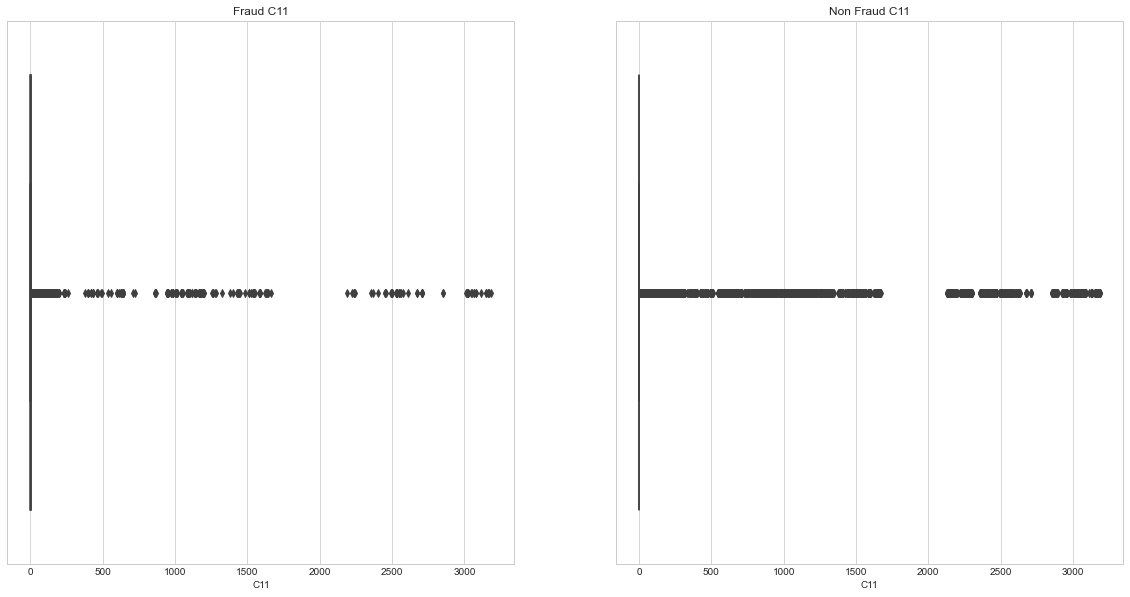

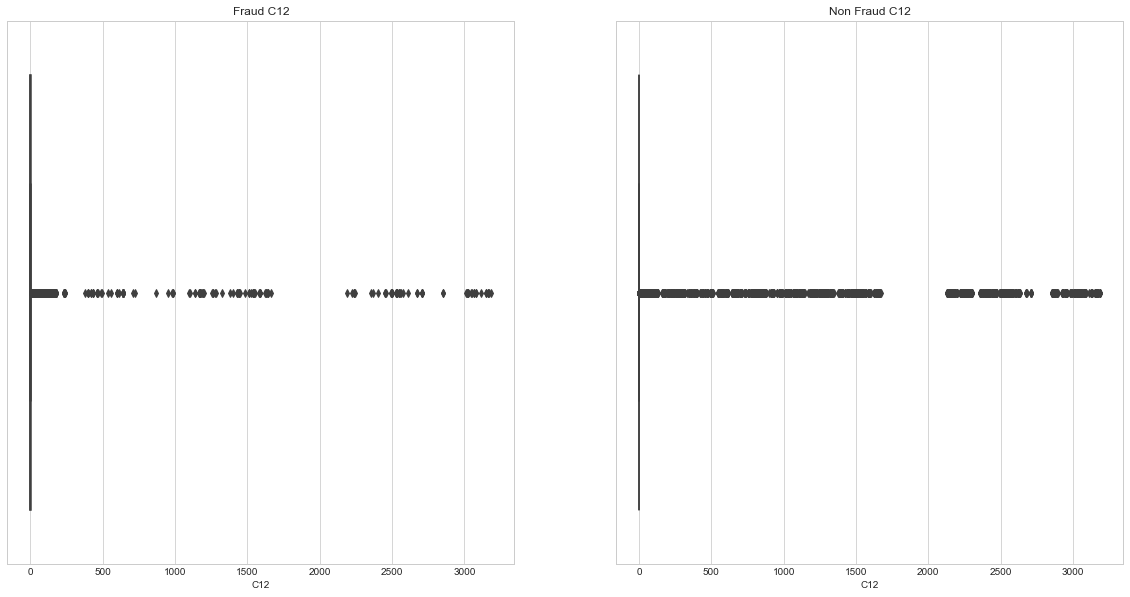

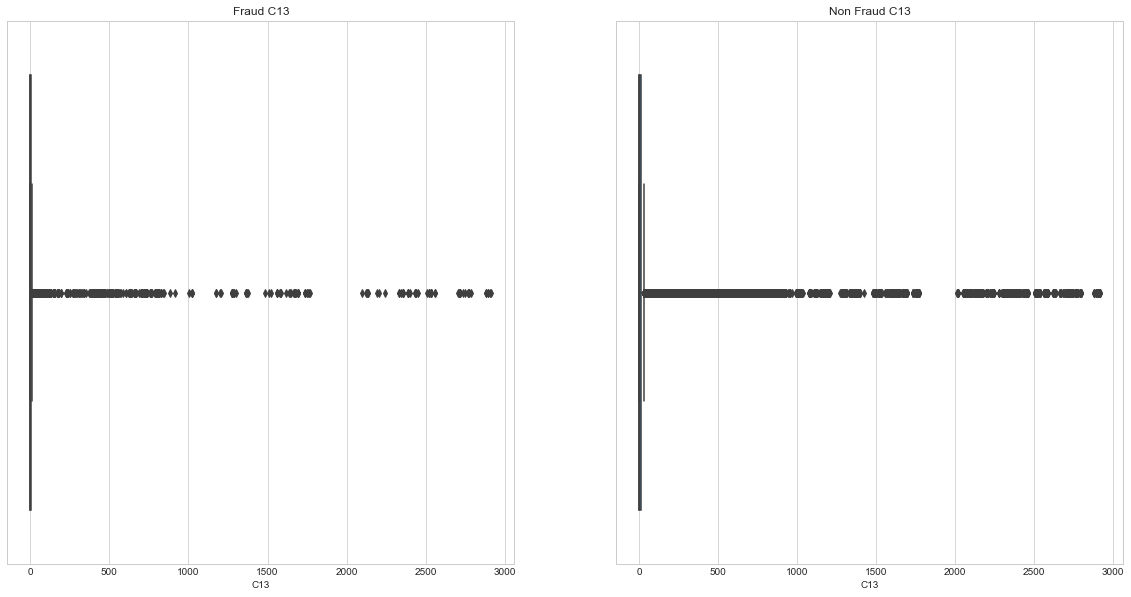

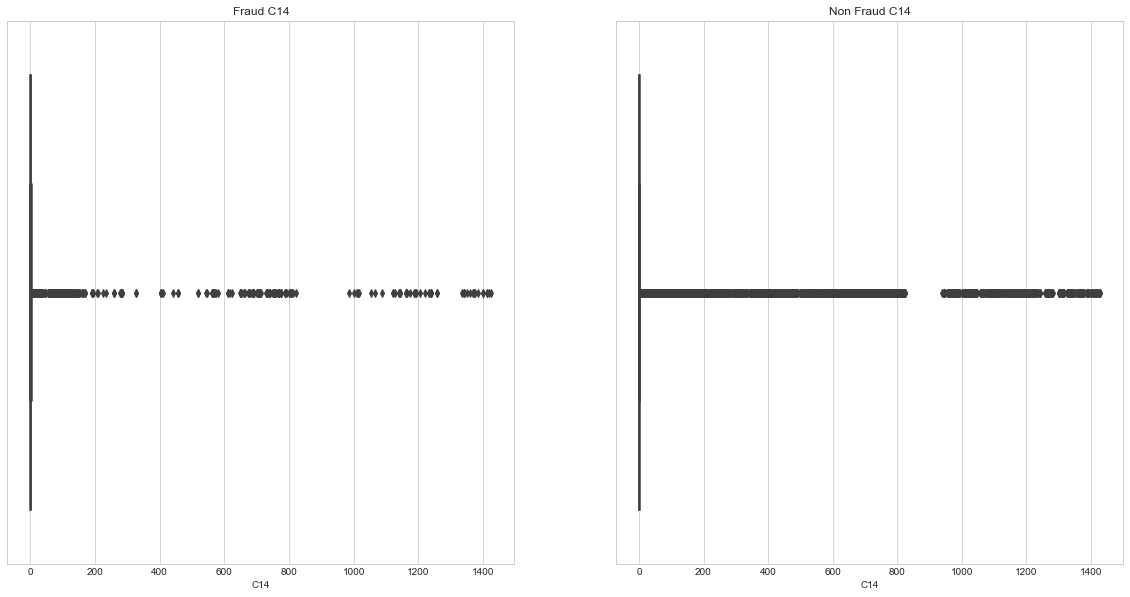

In [90]:
for col in c_cols:
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,10))
    fraud_df = df_train[df_train['isFraud'] == 1]
    nonfraud_df = df_train[df_train['isFraud'] == 0]
    sns.boxplot(fraud_df[col],ax=axes[0])
    sns.boxplot(nonfraud_df[col],ax=axes[1])
    axes[0].title.set_text(f'Fraud {col}')
    axes[1].title.set_text(f'Non Fraud {col}')
    plt.show()

In [100]:
df_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0

In [101]:
df_test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.949999999999999,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,203.0,NaN,NaN,NaN,409.0,T,T,F,NaN,NaN,F,T,T,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000000000000,47.950000762939453,0.000000000000000,0.000000000000000,47.950000762939453,0.000000000000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000000000000,47.950000762939453,0.000000000000000,0.000000000000000,47.950000762939453,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [102]:
X_train = df_train.sort_values('TransactionDT').drop(['isFraud', 'TransactionDT', 'TransactionID'], axis=1)
y_train = df_train.sort_values('TransactionDT')['isFraud']
X_test = df_test.sort_values('TransactionDT').drop(['TransactionDT', 'TransactionID'], axis=1)

print(X_train.shape)
print(X_test.shape)

(590540, 431)
(506691, 431)


In [104]:
def inf_to_nan(df):
    return df.replace([np.inf, -np.inf], np.nan)   

# infinite values to NaN
X_train = clean_inf_nan(X_train)
X_test = clean_inf_nan(X_test)

print(X_train.shape)
print(X_test.shape)

(590540, 431)
(506691, 431)


In [105]:
from sklearn.model_selection import train_test_split
X_train_,X_test_,y_train_,y_test_ = train_test_split(X_train,y_train, stratify = y_train, test_size=0.3, random_state=40)

print(X_train_.shape)
print(X_test_.shape)
print(y_train_.shape)
print(y_test_.shape)

(413378, 431)
(177162, 431)
(413378,)
(177162,)


In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_cols = X_train.select_dtypes(exclude=object).columns.tolist()


# 1. Median imputation for numarical features
# 2. Standardizing


# Featurization of numeric data
imputer = SimpleImputer(strategy='median')
x_train_n = imputer.fit_transform(X_train_[num_cols])
x_test_n = imputer.transform(X_test_[num_cols])
x_test_n = imputer.transform(X_test[num_cols])

scaler = StandardScaler()
x_train_nums = scaler.fit_transform(x_train_n)
x_test_nums = scaler.transform(x_test_n)
x_test_nums = scaler.transform(x_test_n)


x_train_num_final = pd.DataFrame(x_train_nums, columns=num_cols)
x_test_num_final = pd.DataFrame(x_test_nums, columns=num_cols)
x_test_num_final = pd.DataFrame(x_test_nums, columns=num_cols)

print(x_train_num_final.shape)
print(x_test_num_final.shape)
print(x_test_num_final.shape)

(413378, 400)
(506691, 400)
(506691, 400)


In [68]:
df_train.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo', 'dayofweek', 'hour'],
      dtype='object', length=436)

In [ ]:
import scipy as sp
from scipy import stats

# datatype and shape CHK
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

In [ ]:
train_rst = resumetable(train)
train_rst[:5]

In [ ]:
train.columns[train.nunique() == 2]

In [ ]:
train[train.columns[train.nunique() == 2]].head()

In [ ]:
test.columns[test.nunique() == 1]

In [ ]:
train.head()

In [ ]:
train_rst[train_rst['dtypes']=='object']

In [ ]:
# Target Columns
feature_columns = train.loc[:,'isFraud']

In [ ]:
train_m = train.iloc[:,46:55]
train_m.head()

In [ ]:
train_m_chk = pd.concat([feature_columns, train_m], axis=1)
train_m_chk.head()

In [ ]:
resumetable(train_m_chk)

In [ ]:
train_m_chk[train_m_chk['isFraud'] == 1].shape

In [ ]:
# M 전체 행 NaN 없는 경우 출력
train_m_chk_dropna = train_m_chk.dropna()
train_m_chk_dropna.shape

In [ ]:
# 같은것
# '''
# train_m_nona = train_m_chk[(train_m_chk['M1'].notnull()) 
#         & (train_m_chk['M2'].notnull()) 
#         & (train_m_chk['M3'].notnull()) 
#         & (train_m_chk['M4'].notnull()) 
#         & (train_m_chk['M5'].notnull()) 
#         & (train_m_chk['M6'].notnull()) 
#         & (train_m_chk['M7'].notnull()) 
#         & (train_m_chk['M8'].notnull())
#         & (train_m_chk['M9'].notnull())]

# train_m_nona
# '''

In [ ]:
train_m.shape

In [ ]:
# M 모든값이 NaN 행 제외하고 출력
train_m_chk_dropna_all = train_m_chk.dropna(how="all")
train_m_chk_dropna_all.shape
# 모든 값이 NaN인 행은 없음

In [ ]:
train_m_chk_frd = train_m_chk_dropna[train_m_chk_dropna['isFraud'] == 1]
resumetable(train_m_chk_frd.reset_index())

# isFraud=True 중 모든 Mn 값에 대해 NaN이 없는 행 확인... 총 3899행

In [ ]:
# multi columns encoding

from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

class MultiColLabelEncoder:
    def __init__(self):
        self.encoder_dict = defaultdict(LabelEncoder)
        
    def fit_transform(self, X: pd.DataFrame, columns: list): # 컬럼명 리스트 기준으로 레이블인코딩
        if not isinstance(columns, list):
            columns = [columns]
        
        output = X.copy()
        output[columns] = X[columns].apply(lambda x: self.encoder_dict[x.name].fit_transform(x))
        
        return output
    
    def inverse_transform(self, X: pd.DataFrame, columns: list): # 인코딩 된 열 레이블 복구
        if not isinstance(columns, list):
            columns = [columns]
            
        if not all(key in self.encoder_dict for key in columns):
            raise KeyError(f'At least one of {columns} is not encoded before')
            
        output = X.copy()
        try:
            output[columns] = X[columns].apply(lambda x: self.encoder_dict[x.name].inverse_transform(x))
        except ValueError:
            print(f'Need assignment when do "fit_transform" function')
            raise
            
        return output

In [ ]:
# encoding
list_obj_trans = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']
train_m_chk_encoded = MultiColLabelEncoder().fit_transform(train_m_chk, columns=list_obj_trans)

# Check
display(train_m_chk_encoded.tail(10))
display(train_m_chk.tail(10))

In [ ]:
train_m_chk_encoded.describe()

In [ ]:
# Mn 상관관계 확인
plt.figure(figsize=(10,10))
sns.heatmap(train_m_chk_encoded.corr(), annot=True)
plt.show()

## Mn 컬럼내 변수들은 isFraud 와 확연하게 눈에 띄는 상관관계는 없음...

- 시각화 결과 오히려 (M1, M2, M3) 와 (M4, M5) 그리고 (M7, M8, M9)가 서로 상관관계가 높은 것으로 보임
- 따로노는것 같은 M6의 경우 모든 Mn 컬럼들 중 isFraud와 가장 큰 상관관계를 갖음으로 그냥 버리기도 애매함
- 결국 인코딩하여 결측치 없앤 후 모든 컬럼 사용하는게 좋을것으로 사료됨

In [ ]:
# import models
!pip install pyod

In [ ]:
from pyod.models.lof import LOF
from pyod.models.hbos import HBOS
from pyod.models.pca import PCA
from pyod.models.iforest import IForest

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
# encoding
list_obj_trans = list(train_rst[train_rst['dtypes'] == 'object']['Name'])
train_encoded = MultiColLabelEncoder().fit_transform(train, columns=list_obj_trans)

# NaN 처리 => -9999
train_encoded_fna = train_encoded.fillna(-999.9)

In [ ]:
# 우선 생으로 돌려보기
X_train = train_encoded_fna.drop(columns=['isFraud'])
y_train = train_encoded_fna[['isFraud']]

# X_train = train_m_chk_encoded.drop(columns=['isFruad'])
# y_train = train_m_chk_encoded[['isFraud']]

# # standardize
# scaler = MinMaxScaler(feature_range=(0,1))
# X_train[['Amount']] = scaler.fit_transform(X_train[['Amount']])

In [ ]:
# setting parameters
random_state = np.random.RandomState(0xC0FFEE)
outliers_fraction = 0.0035
# Define seven outlier detection tools to be compared
classifiers = {
        'LOF': LOF(contamination=outliers_fraction),
        'HBOS': HBOS(contamination=outliers_fraction),
        'PCA': PCA(contamination=outliers_fraction),
        'Isolation Forest': IForest(contamination=outliers_fraction,random_state=random_state),
}

# model fitting
for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X_train)
    y_pred = clf.labels_
    print(clf_name)
    print('accuracy : ',round(accuracy_score(y_train,y_pred),3))
    print('precision : ',round(precision_score(y_train,y_pred),3))
    print('recall : ',round(recall_score(y_train,y_pred),3))
    print('f1 : ',round(f1_score(y_train,y_pred),3))
    print('-------------------')

In [ ]:
train_card = train_encoded.iloc[:,5:11]
train_card_frd = pd.concat([train_encoded.loc[:,'isFraud'],train_card], axis=1)

train_others = pd.concat([train_encoded.iloc[:,2:5], train_encoded.iloc[:,11:17]], axis=1)
train_others_frd = pd.concat([train_encoded.loc[:,'isFraud'],train_others], axis=1)

train_c = train_encoded.iloc[:,17:31]
train_c_frd = pd.concat([train_encoded.loc[:,'isFraud'],train_c], axis=1)

train_d = train_encoded.iloc[:,31:46]
train_d_frd = pd.concat([train_encoded.loc[:,'isFraud'],train_d], axis=1)

train_v = train_encoded.iloc[:,55:394]
train_v_frd = pd.concat([train_encoded.loc[:,'isFraud'],train_v], axis=1)

train_id = train_encoded.iloc[:,394:]
train_id_frd = pd.concat([train_encoded.loc[:,'isFraud'],train_id], axis=1)

In [ ]:
resumetable(train_card)
resumetable(train_others)
resumetable(train_c)
resumetable(train_d)
resumetable(train_v)
resumetable(train_id)

In [ ]:
train_card_frd_fn = train_card_frd.fillna(train_card_frd.median())

train_others_frd_fn = train_others_frd.fillna(train_others_frd.median())

train_c_frd_fn = train_c_frd.fillna(train_c_frd.median())

train_d_frd_fn = train_d_frd.fillna(train_d_frd.median())

train_v_frd_fn = train_v_frd.fillna(train_v_frd.median())

train_id_frd_fn = train_id_frd.fillna(train_id_frd.median())

In [ ]:
# 전체 상관관계 확인
plt.figure(figsize=(10,10))
sns.heatmap(train_card_frd_fn.corr(), annot=True)
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(train_others_frd_fn.corr(), annot=True)
plt.show()

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(train_c_frd_fn.corr(), annot=True)
plt.show()

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(train_d_frd_fn.corr(), annot=True)
plt.show()

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(train_id_frd_fn.corr(), annot=True)
plt.show()

In [ ]:
# 차마 겁나서 이건 못돌리겠음...
# plt.figure(figsize=(100,100))
# sns.heatmap(train_v_frd_fn.corr(), annot=True)
# plt.show()

In [ ]:
# NaN 처리 => mean, medain
train_encoded_fna_mean = train_encoded.fillna(train_encoded.mean(numeric_only=True))
train_encoded_fna_median = train_encoded.fillna(train_encoded.median())

In [ ]:
train_encoded_fna_mean.head(10)

In [ ]:
resumetable(train_encoded_fna_mean)

In [ ]:
train_encoded_fna_median.head(10)

In [ ]:
resumetable(train_encoded_fna_median)

In [ ]:
# 우선 생으로 돌려보기
X_train = train_encoded_fna_mean.drop(columns=['isFraud'])
y_train = train_encoded_fna_mean[['isFraud']]

X_train_1 = train_encoded_fna_median.drop(columns=['isFraud'])
y_train_1 = train_encoded_fna_median[['isFraud']]

# setting parameters
random_state = np.random.RandomState(0xC0FFEE)
outliers_fraction = 0.0035
# Define seven outlier detection tools to be compared
classifiers = {
        'LOF': LOF(contamination=outliers_fraction),
        'HBOS': HBOS(contamination=outliers_fraction),
        'PCA': PCA(contamination=outliers_fraction),
        'Isolation Forest': IForest(contamination=outliers_fraction,random_state=random_state),
}

# model fitting 1
for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X_train)
    y_pred = clf.labels_
    print(clf_name)
    print('accuracy : ',round(accuracy_score(y_train,y_pred),3))
    print('precision : ',round(precision_score(y_train,y_pred),3))
    print('recall : ',round(recall_score(y_train,y_pred),3))
    print('f1 : ',round(f1_score(y_train,y_pred),3))
    print('-------------------')
    
# model fitting 2
for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X_train_1)
    y_pred_1 = clf.labels_
    print(clf_name)
    print('accuracy : ',round(accuracy_score(y_train_1,y_pred_1),3))
    print('precision : ',round(precision_score(y_train_1,y_pred_1),3))
    print('recall : ',round(recall_score(y_train_1,y_pred_1),3))
    print('f1 : ',round(f1_score(y_train_1,y_pred_1),3))
    print('-------------------')

## rubish

In [ ]:
len(train_m_chk_frd_encoded[train_m_chk_frd_encoded['M4'] == 2])

In [ ]:
train_m_chk_frd_encoded.corr()

In [ ]:
# Fraud 중 상관관계 확인
list_obj_trans = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']
train_m_chk_encoded = MultiColLabelEncoder().fit_transform(train_m_chk, columns=list_obj_trans)

plt.figure(figsize=(10,10))
sns.heatmap(train_m_chk_encoded.corr(), annot=True)
plt.show()

In [ ]:
# 전체 상관관계 확인
list_obj_trans = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']
train_m_chk_encoded = MultiColLabelEncoder().fit_transform(train_m_chk, columns=list_obj_trans)

plt.figure(figsize=(10,10))
sns.heatmap(train_m_chk_encoded.corr(), annot=True)
plt.show()

In [ ]:
# NaN 
list_obj_trans = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']
train_m_chk_encoded = MultiColLabelEncoder().fit_transform(train_m_chk, columns=list_obj_trans)

plt.figure(figsize=(10,10))
sns.heatmap(train_m_chk_encoded.corr(), annot=True)
plt.show()

In [ ]:
list_obj_trans = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']
train_m_dropna_encoded = MultiColLabelEncoder().fit_transform(train_m_dropna, columns=list_obj_trans)

plt.figure(figsize=(10,10))
sns.heatmap(train_m_dropna_encoded.corr(), annot=True)
plt.show()

In [ ]:
len(train_m_chk_frd[train_m_chk_frd['M1'] == 'T'])

In [ ]:
len(train_m_chk_frd)

In [ ]:
len(train_m[train_m['M1'] == 'T'])

In [ ]:
train_m_chk_frd_encoded[train_m_chk_frd_encoded.columns[2]]

In [ ]:
for i in range(2,10):
    print(f'M{i} mean value:', train_m_chk_frd_encoded[train_m_chk_frd_encoded.columns[i]].mean())

In [ ]:
train.iloc[:,-7:-2].head(50)

In [ ]:
train['id_34'].value_counts()

In [ ]:
train[train['id_34'] == 'match_status:2'].iloc[:,-7:-2].head(20)

In [ ]:
train[train['id_34'] == 'match_status:-1'].head(100)

In [ ]:
train[train['id_34'] == 'match_status:0'].head(200)

In [ ]:
train[train['id_34'] == 'match_status:1'].head(100)

In [ ]:
# 연산을 위한 데이터타입 변환
train['TransactionAmt'] = train['TransactionAmt'].astype(float)

# 거래 금액 분위 확인
print(train['TransactionAmt'].quantile([.01, .025, .05, .1, .25, .5, .75, .9, .95, .975, .99]))

In [ ]:
# 거래 시간에 따른 분포 확인
train['TransactionDT'].plot(kind='hist',
                                        figsize=(15, 5),
                                        label='train',
                                        bins=500,
                                        title='TransactionDT distribution')
plt.show()

In [ ]:
# 거래 시간

In [ ]:
# 연산을 위한 데이터타입 변환
train['TransactionAmt'] = train['TransactionAmt'].astype(float)
train['isFraud'] = train['isFraud'].astype(int)

total = len(train)
total_amt = train.groupby(['isFraud'])['TransactionAmt'].sum().sum()

# 시각화
plt.figure(figsize=(15,5))

# 거래 건수 기준 Fraud 비율 확인 
plt.subplot(121)
sp = sns.countplot(x='isFraud', data=train)  
sp.set_title("Fraud Transactions Distribution \n 0: No Fraud | 1: Fraud", fontsize=15)
sp.set_xlabel("Is fraud?")
sp.set_ylabel('Count')
for i in sp.patches:
    height = i.get_height()
    sp.text(i.get_x()+i.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=10) 

# 거래 금액 기준 Fraud 비율 확인 
perc_amt = (train.groupby(['isFraud'])['TransactionAmt'].sum())
perc_amt = perc_amt.reset_index()

plt.subplot(122)
sp1 = sns.barplot(x='isFraud', y='TransactionAmt',  dodge=True, data=perc_amt)
sp1.set_title("% Total Amount in Transaction Amt \n 0: No Fraud | 1: Fraud", fontsize=15)
sp1.set_xlabel("Is fraud?")
sp1.set_ylabel('Total Transaction Amount')
for i in sp1.patches:
    height = i.get_height()
    sp1.text(i.get_x()+i.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_amt * 100),
            ha="center", fontsize=10) 
    
plt.show()

- 거래 건수 및 금액 기준 약 3% 중,후반대로 Fraud 발생 ==> 크지 않은 비중

In [ ]:
train_rst_card = train_rst[5:11]
train_rst_card

In [ ]:
# multi columns encoding

from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

class MultiColLabelEncoder:
    def __init__(self):
        self.encoder_dict = defaultdict(LabelEncoder)
        
    def fit_transform(self, X: pd.DataFrame, columns: list): # 컬럼명 리스트 기준으로 레이블인코딩
        if not isinstance(columns, list):
            columns = [columns]
        
        output = X.copy()
        output[columns] = X[columns].apply(lambda x: self.encoder_dict[x.name].fit_transform(x))
        
        return output
    
    def inverse_transform(self, X: pd.DataFrame, columns: list): # 인코딩 된 열 레이블 복구
        if not isinstance(columns, list):
            columns = [columns]
            
        if not all(key in self.encoder_dict for key in columns):
            raise KeyError(f'At least one of {columns} is not encoded before')
            
        output = X.copy()
        try:
            output[columns] = X[columns].apply(lambda x: self.encoder_dict[x.name].inverse_transform(x))
        except ValueError:
            print(f'Need assignment when do "fit_transform" function')
            raise
            
        return output

In [ ]:
list_obj_trans = list(df_trans_rst[df_trans_rst['dtypes'] == 'object']['Name'])

obj_to_int_trans = MultiColLabelEncoder().fit_transform(df_trans, columns=list_obj_trans)
obj_to_int_trans[list_obj_trans].head()
# obj_to_int_trans.head()

In [ ]:
df_trans[list_obj_trans].head()

In [ ]:
print(df_trans['ProductCD'].value_counts())
print(obj_to_int_trans['ProductCD'].value_counts())

In [ ]:
# df_train.corr()
# 의미 없는 것으로 확인